In [1]:
# Data Manuiplation dependencies
# https://numpy.org/
import numpy as np
# https://pandas.pydata.org/
import pandas as pd 
#----------------------------------
# Visualisations dependencies
# https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#https://seaborn.pydata.org/
import seaborn as sns
#-------------------------------------
import warnings
import itertools
import os
#--------------------------------
sns.set(style="darkgrid")
# Modelling dependencies
#sklearn Dependencies
# All dependencies can be found here https://scikit-learn.org/stable/
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings('ignore')

#-----------------------------------------------------------------------

In [2]:
# Some Useful Functions
def Distribution_plot(dataframe,feature, target, title, xlabel):
    """"
    Plot Distribution of feature for both classes
    
    Parameters
    ------------
    dataframe: Training dataframe
    feature: Variable to find distribution
    target: Dependent variable column containing all classes
    title: Plot title
    """
    
    # set the figure size
    plt.figure(figsize=(10,8))

    ax = plt.subplot()
    #distribution plot for all classes
    sns.distplot(dataframe[feature][dataframe[target] == 0], bins=50, label="Deprived Area")
    sns.distplot(dataframe[feature][dataframe[target] ==1], bins=50, label="Developed Area")
    sns.distplot(dataframe[feature][dataframe[target] ==2], bins=50, label="Water Area")

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)

    # Add legend and show plot
    ax.legend(title="Area classification")
    plt.show()

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)        


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
#-------------------------------------------------------------------------------------------

In [4]:
context_df= pd.read_csv("Contextual_Features_final.csv")
context_df

long_x     lat_x  Label_x  Point  orb_sc31_mean  lbpm_sc7_skew  \
0      3.204167  6.911667        0      1            0.0       0.270030   
1      3.201667  6.910834        0      2            0.0       0.285240   
2      3.202500  6.910834        0      3            0.0       0.287056   
3      3.203333  6.910834        0      4            0.0       0.290286   
4      3.204167  6.910834        0      5            0.0       0.288670   
...         ...       ...      ...    ...            ...            ...   
47555  3.343333  6.402500        2  47556            0.0       0.314339   
47556  3.344167  6.402500        2  47557            0.0       0.309012   
47557  3.345000  6.402500        2  47558            0.0       0.310296   
47558  3.345833  6.402500        2  47559            0.0       0.301661   
47559  3.342500  6.401667        2  47560            0.0       0.320525   

       lbpm_sc5_max  lbpm_sc3_max  lbpm_sc5_skew  lbpm_sc3_variance  ...  \
0             14.34          5.86       1.560535           1.357117  ...   
1             14.03          5.66       1.642616           1.298286  ...   
2             13.76          5.69       1.668987           1.287736  ...   
3             13.71          5.71       1.677506           1.274064  ...   
4             13.87          5.71       1.653008           1.297419  ...   
...             ...           ...            ...                ...  ...   
47555         14.06          5.71       1.793999           1.306651  ...   
47556         14.44          5.81       1.755604           1.329609  ...   
47557         14.34          5.79       1.778788           1.280565  ...   
47558         14.47          5.73       1.753074           1.244170  ...   
47559         13.52          5.51       1.826286           1.275029  ...   

       sfs_sc31_mean  pantex_sc7_min  sfs_sc71_mean  mean_sc3_mean  \
0           6.256875        0.075135      11.293056      17.941944   
1           5.845625        0.087135      10.344444      18.163293   
2           6.143125        0.087762      10.166111      18.506399   
3           6.596875        0.088532      10.079583      18.670962   
4           6.621250        0.083159      11.016111      19.018102   
...              ...             ...            ...            ...   
47555       5.310000        0.048921       9.412222      22.805540   
47556       5.401250        0.051810       9.359722      23.085196   
47557       5.596563        0.062492       9.236944      23.281853   
47558       5.756563        0.062437       9.180139      23.526009   
47559       4.770313        0.047175       9.134167      23.620053   

       sfs_sc71_min_line_length  sfs_sc31_min_line_length  mean_sc5_variance  \
0                          1.02                      1.01          52.432308   
1                          1.04                      1.00          53.613892   
2                          1.03                      1.00          56.248843   
3                          1.01                      1.00          57.401369   
4                          1.01                      1.00          59.059388   
...                         ...                       ...                ...   
47555                      1.42                      1.00          85.862135   
47556                      1.37                      1.00          87.570965   
47557                      1.29                      1.00          90.447485   
47558                      1.26                      1.00          91.148175   
47559                      2.32                      1.00          89.895443   

       sfs_sc51_std  sfs_sc31_w_mean  sfs_sc51_max_line_length  
0          9.121337         1.121139                     26.93  
1          8.320140         0.800757                     25.41  
2          8.357677         0.904919                     24.37  
3          8.167025         1.012568                     23.79  
4          8.533981         1.005354                     25.24  
...

In [5]:
context_df= context_df.drop(columns=["Point","long", "lat", "long_x", "lat_x", "Label_x", "long_y","Label_y","lat_y"])


In [6]:
print(context_df.head())

   orb_sc31_mean  lbpm_sc7_skew  lbpm_sc5_max  lbpm_sc3_max  lbpm_sc5_skew  \
0            0.0       0.270030         14.34          5.86       1.560535   
1            0.0       0.285240         14.03          5.66       1.642616   
2            0.0       0.287056         13.76          5.69       1.668987   
3            0.0       0.290286         13.71          5.71       1.677506   
4            0.0       0.288670         13.87          5.71       1.653008   

   lbpm_sc3_variance  lsr_sc71_line_contrast  lsr_sc51_line_length  \
0           1.357117                3.684017              3.062289   
1           1.298286                3.708492              3.092897   
2           1.287736                3.704993              3.073846   
3           1.274064                3.688870              3.064352   
4           1.297419                3.670432              3.040582   

   orb_sc71_variance  lbpm_sc3_mean  ...  sfs_sc31_mean  pantex_sc7_min  \
0                0.0       0.445090

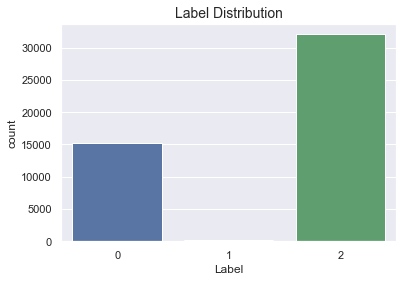

In [7]:
#Label Distribution plot
sns.countplot('Label', data=context_df,)
plt.title('Label Distribution', fontsize=14)
plt.xlabel("Label")
plt.show()


In [8]:
context_df["Label"].value_counts()

2    32089
0    15202
1      269
Name: Label, dtype: int64

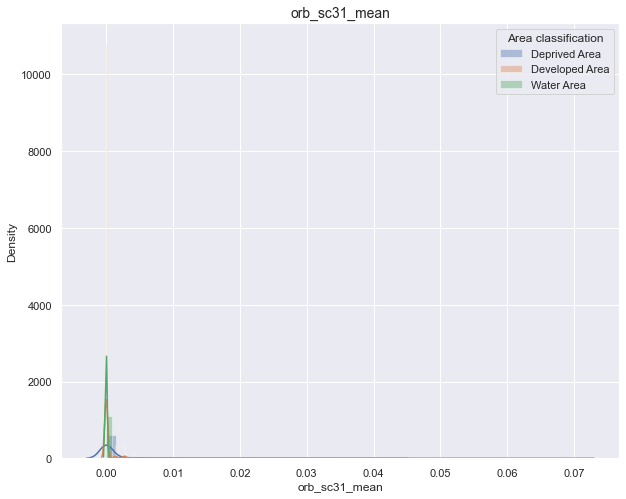

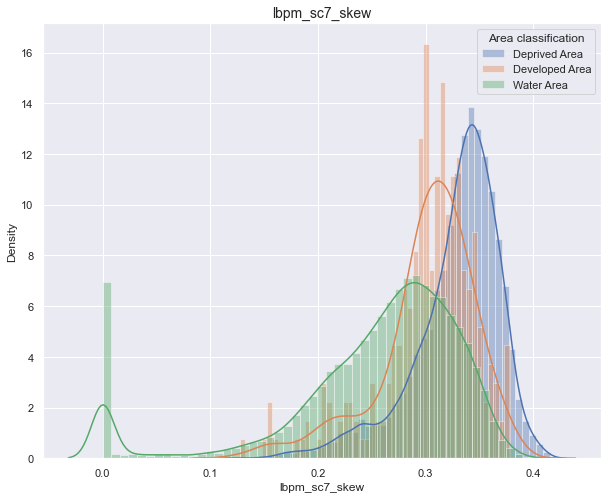

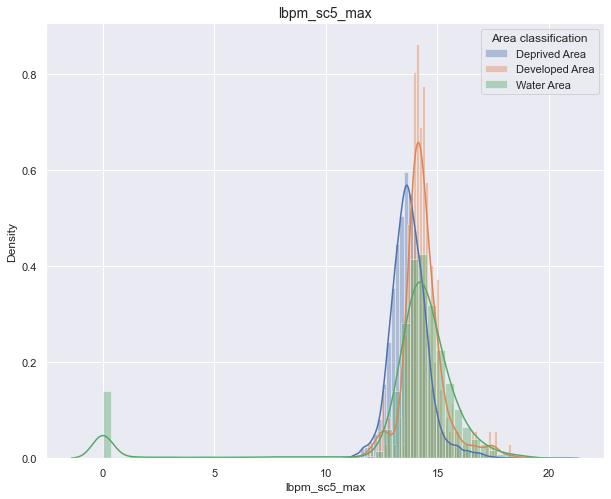

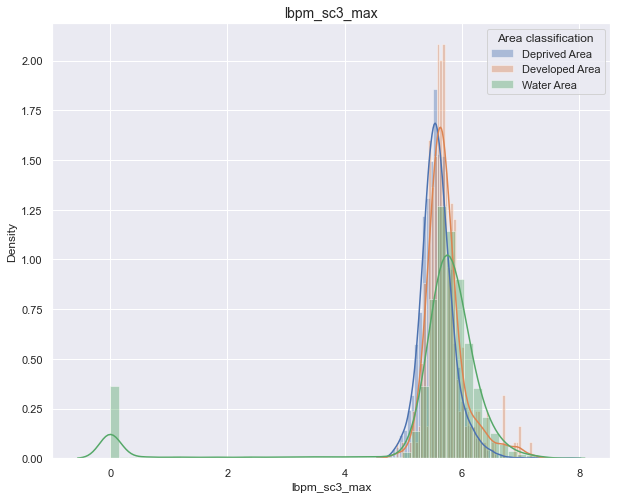

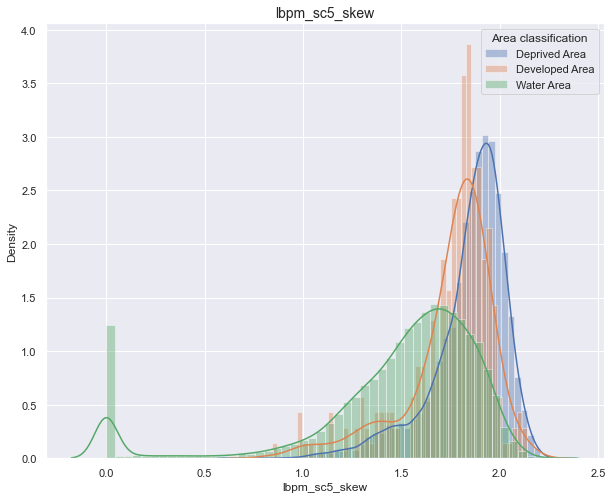

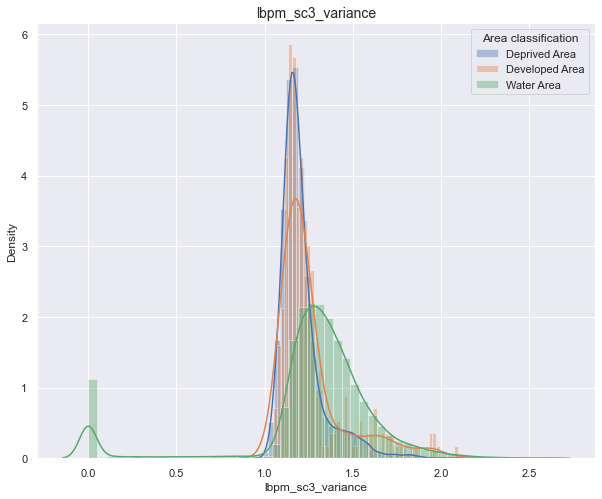

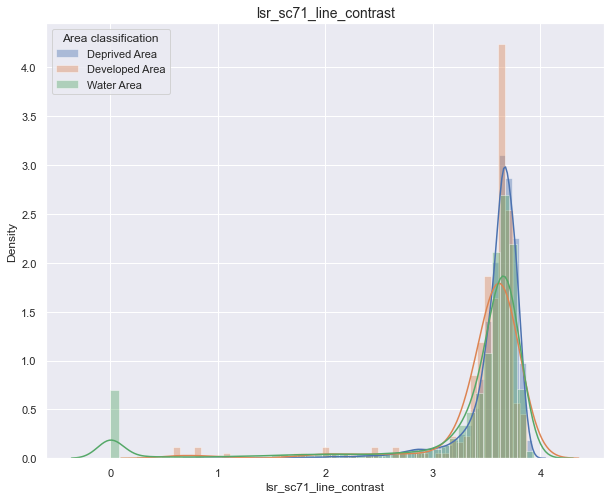

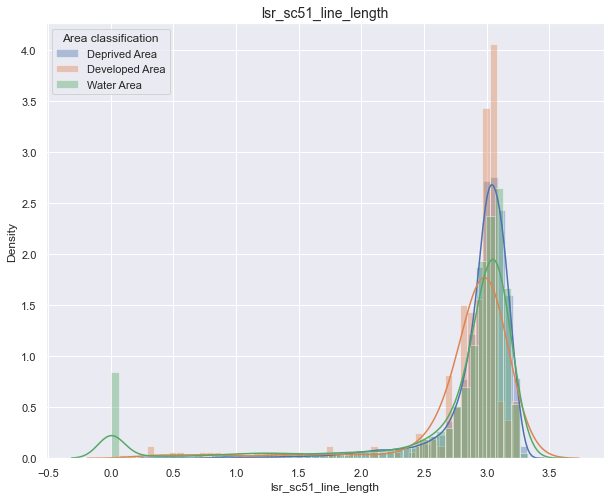

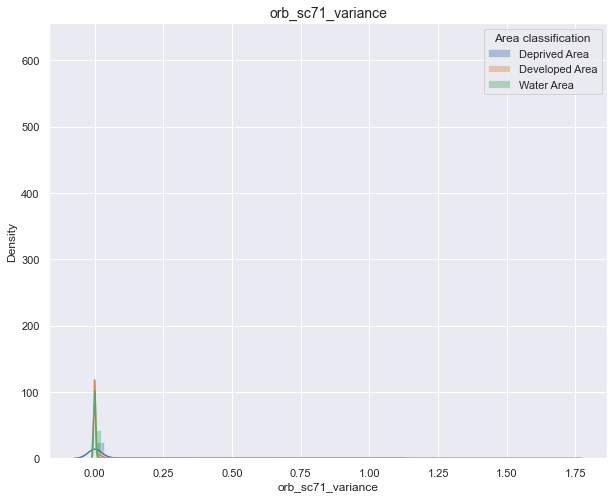

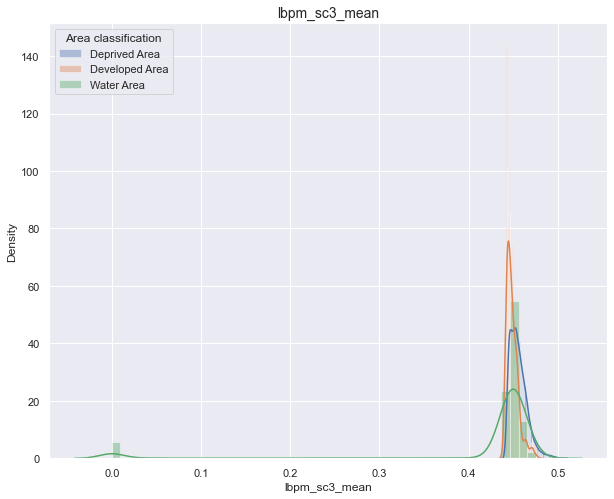

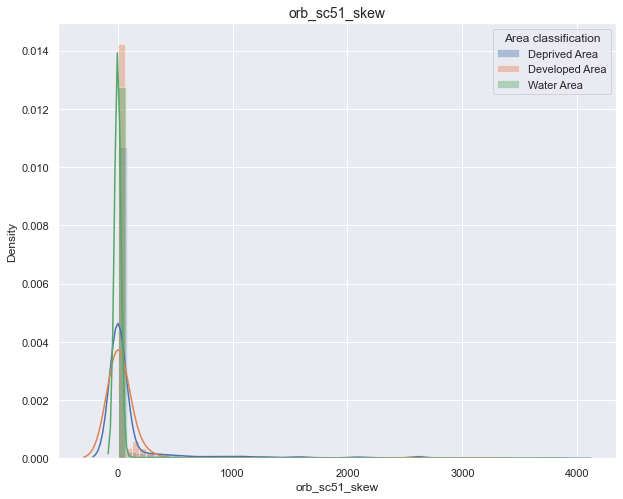

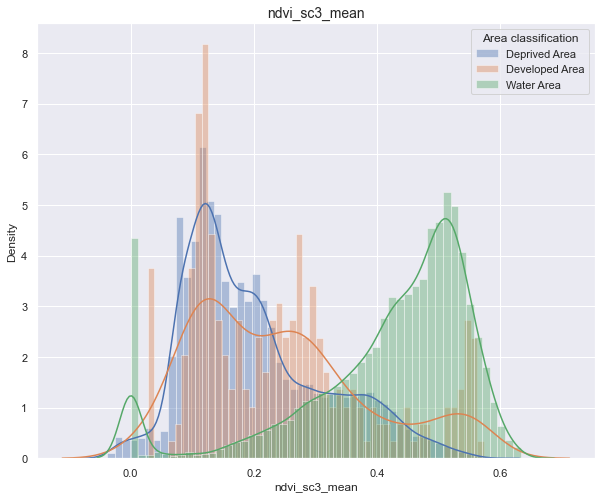

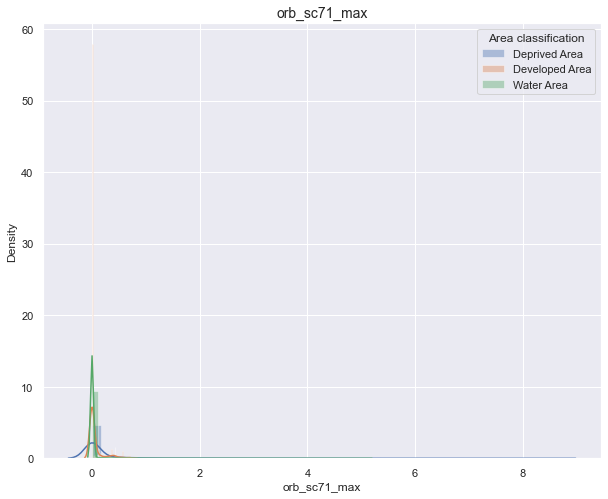

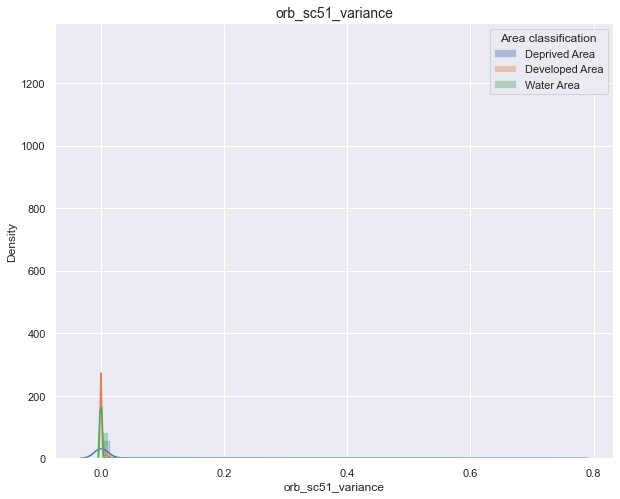

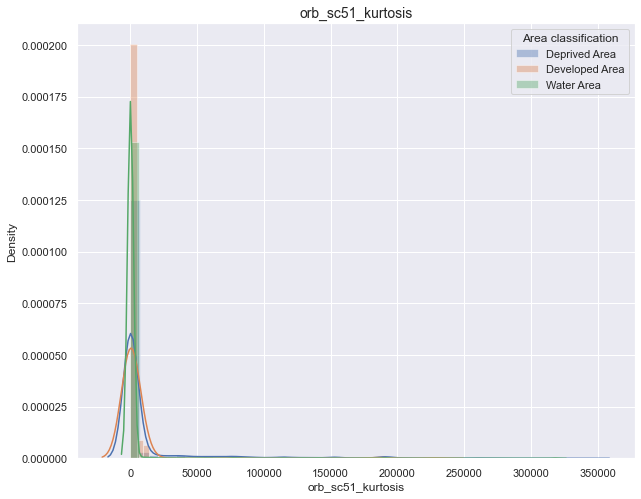

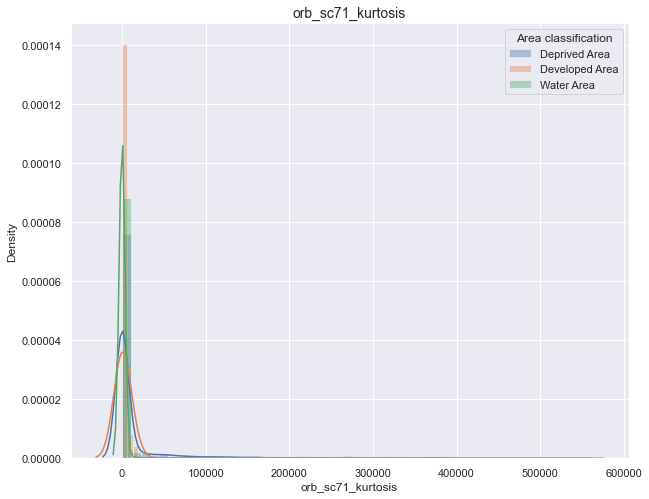

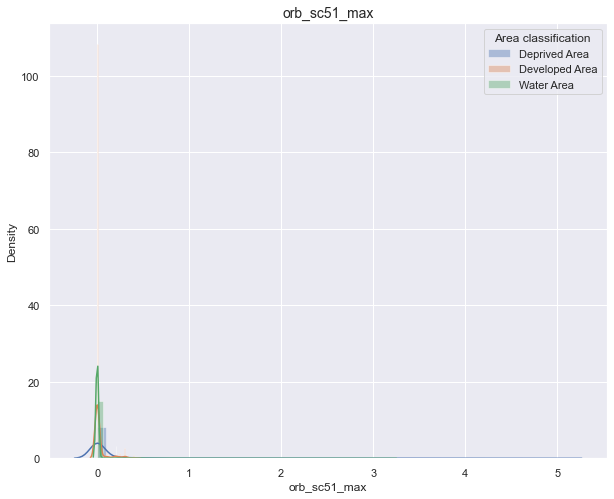

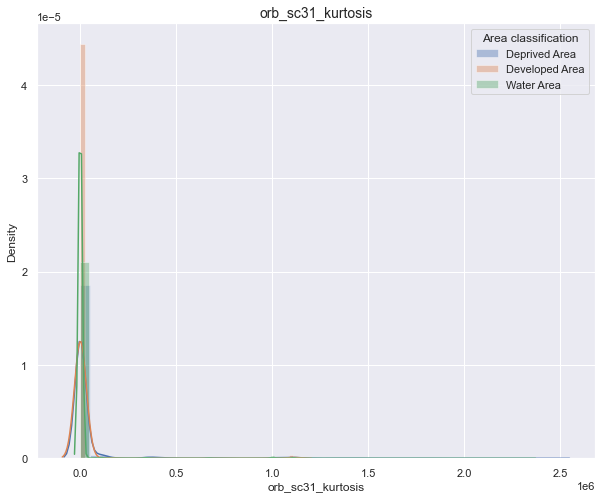

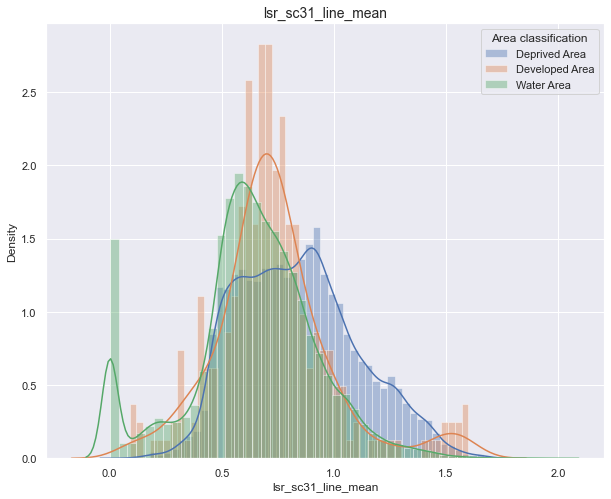

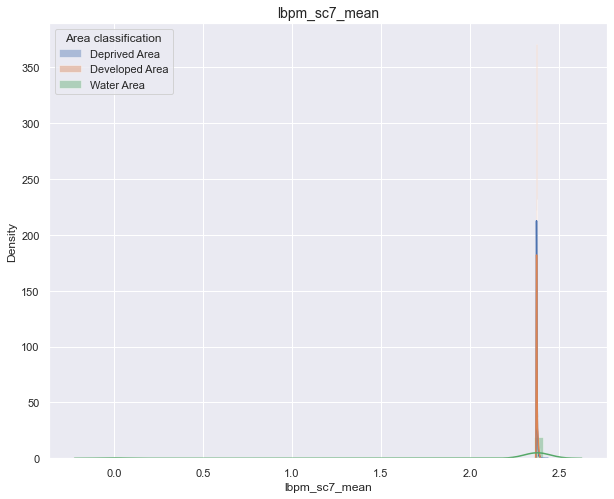

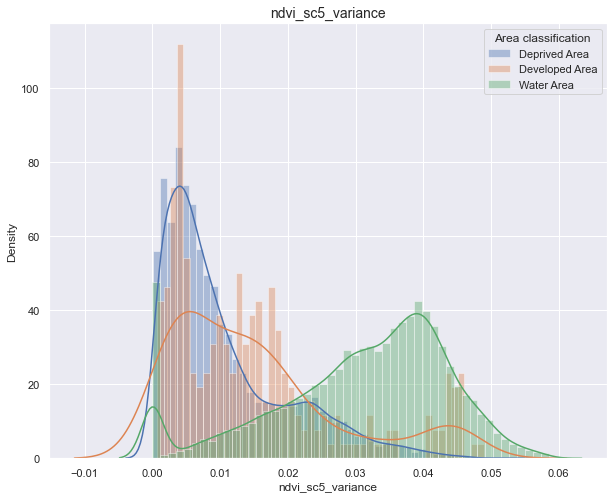

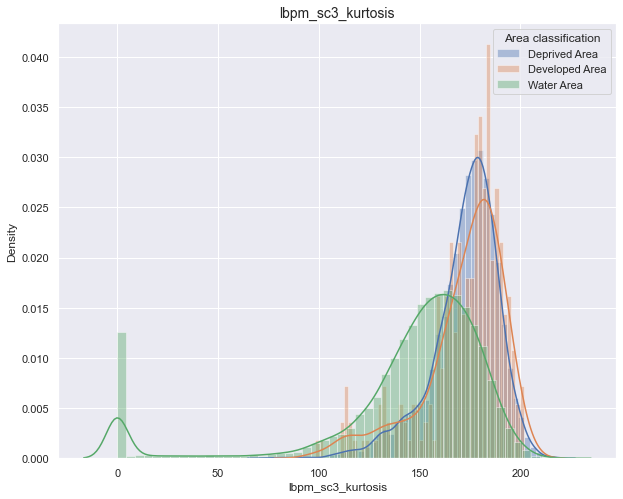

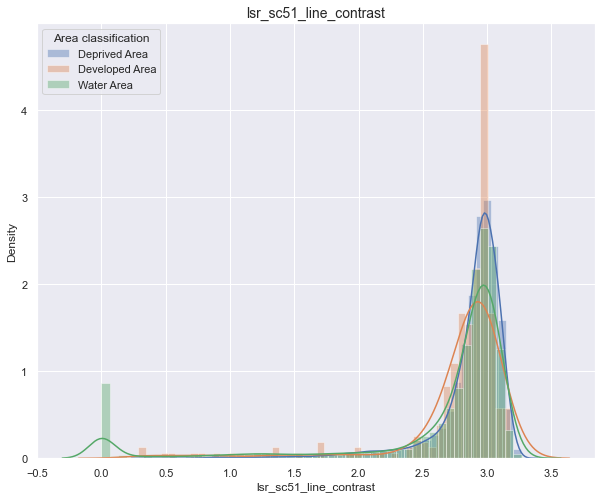

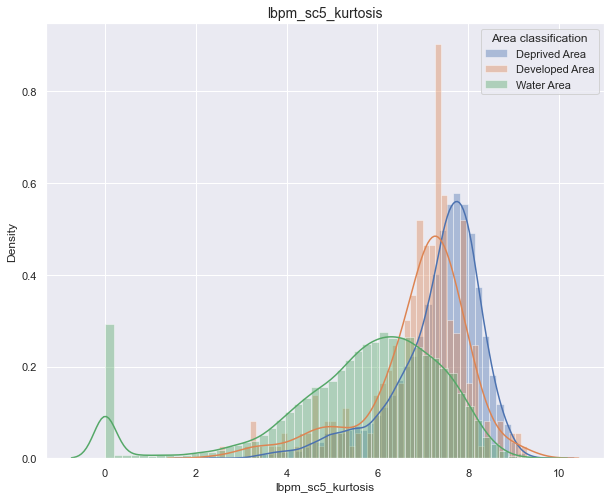

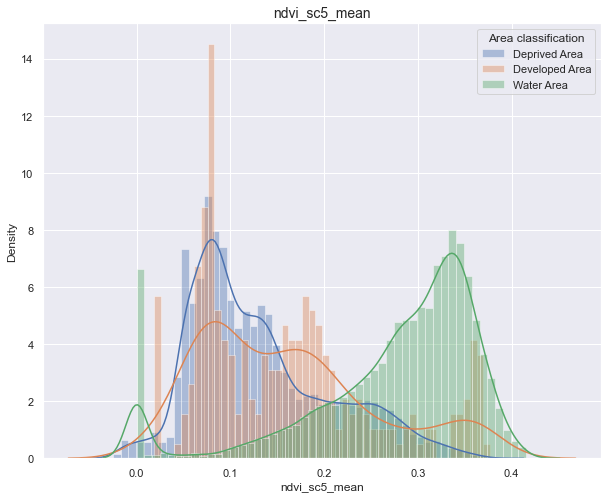

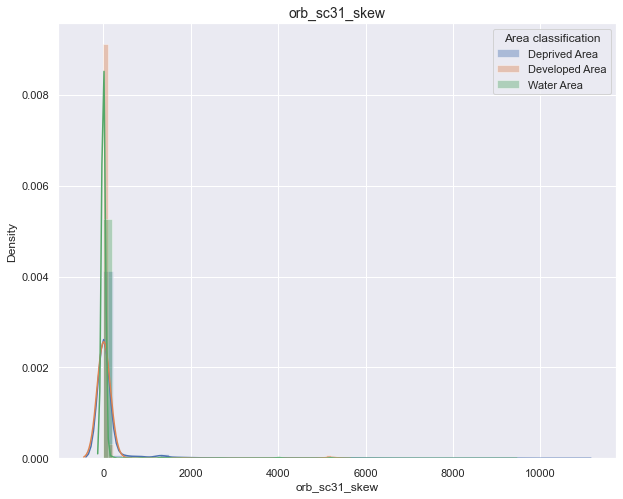

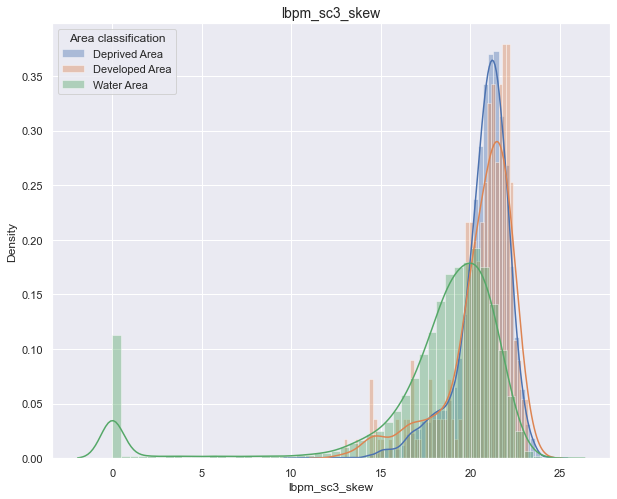

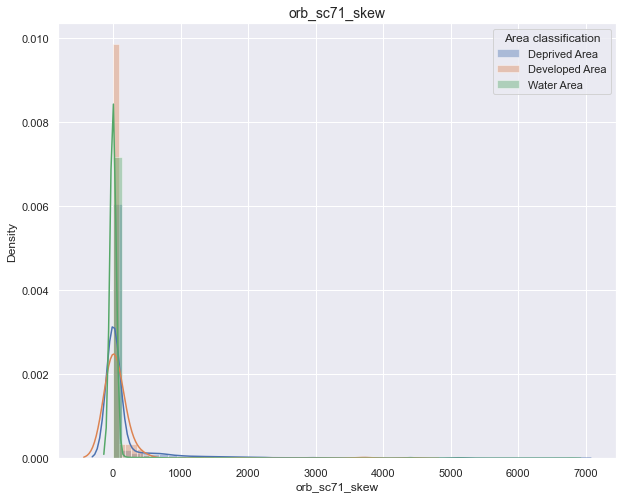

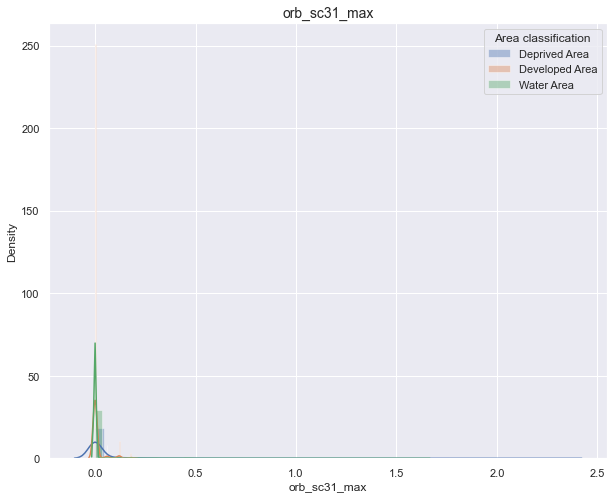

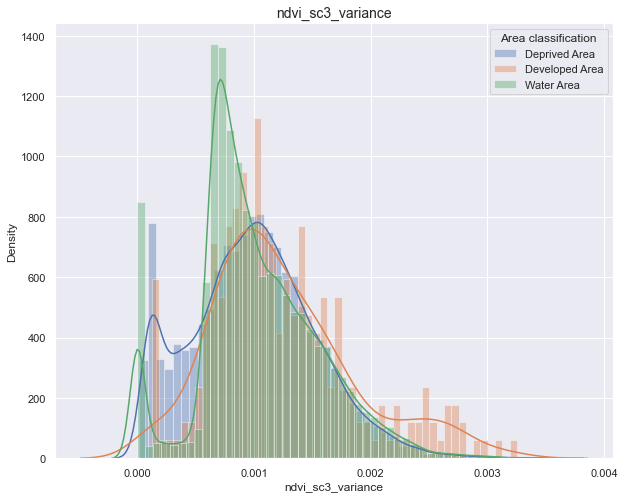

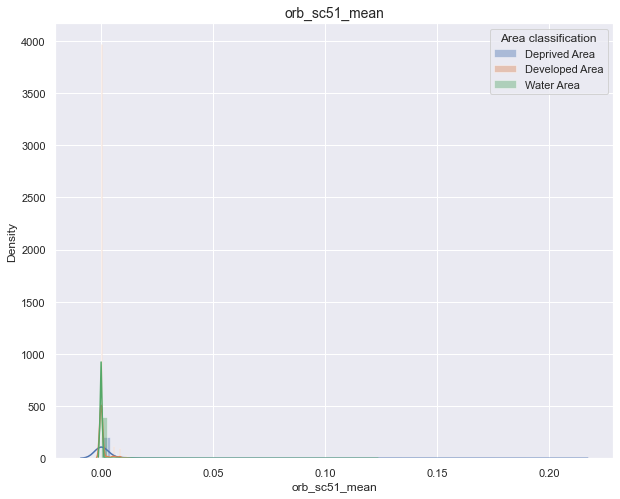

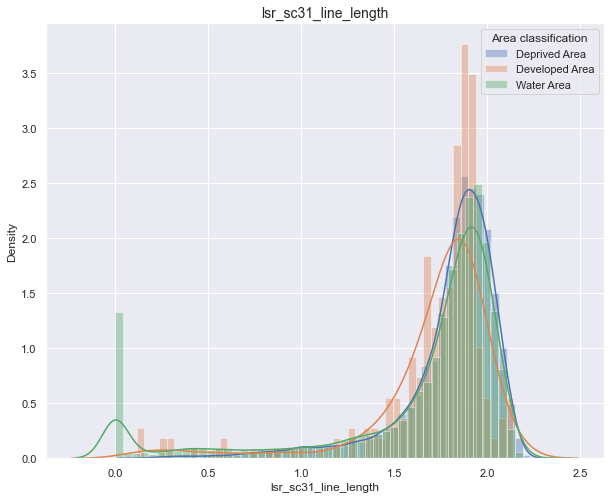

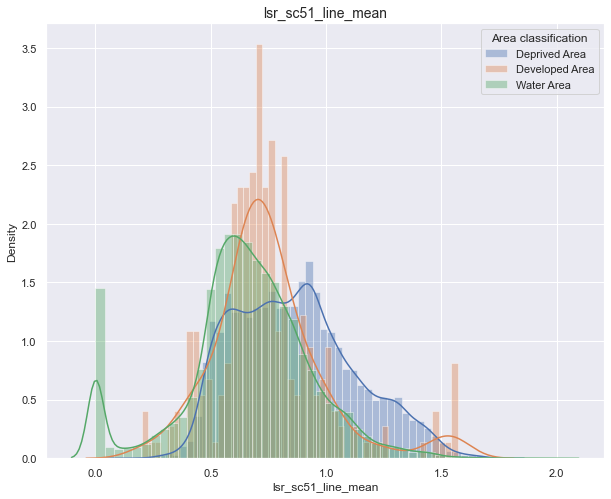

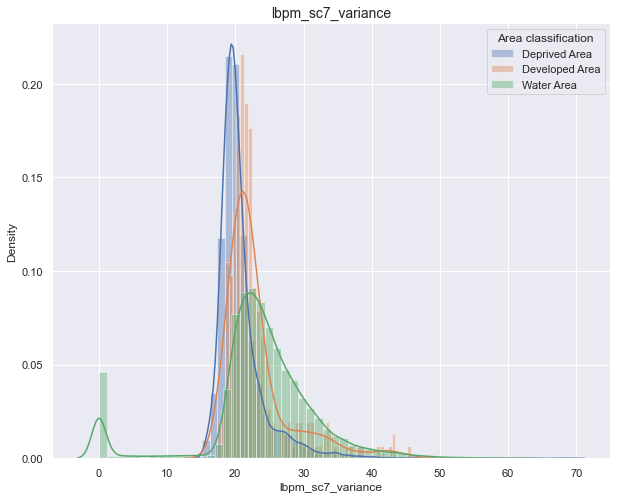

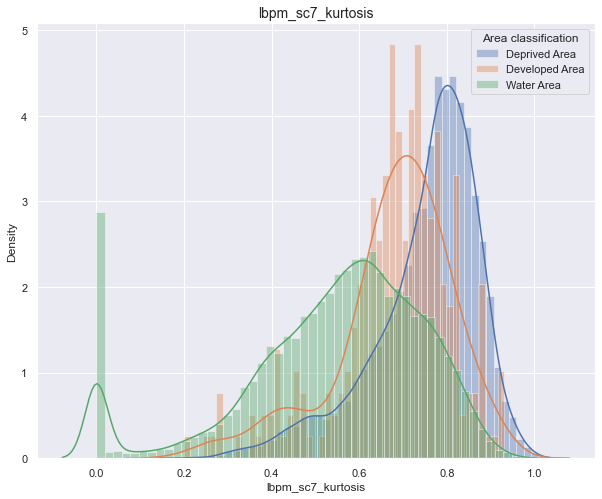

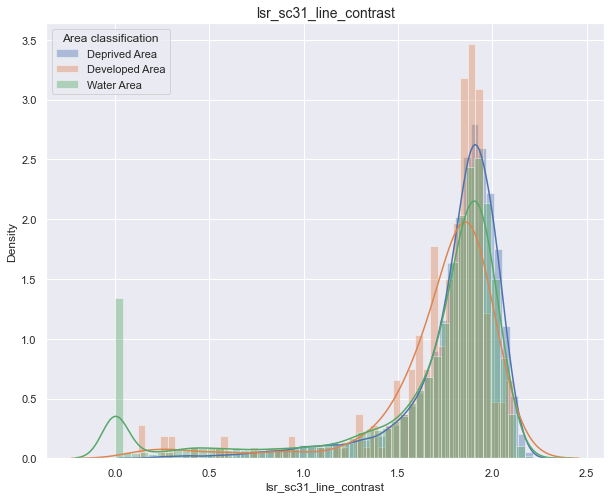

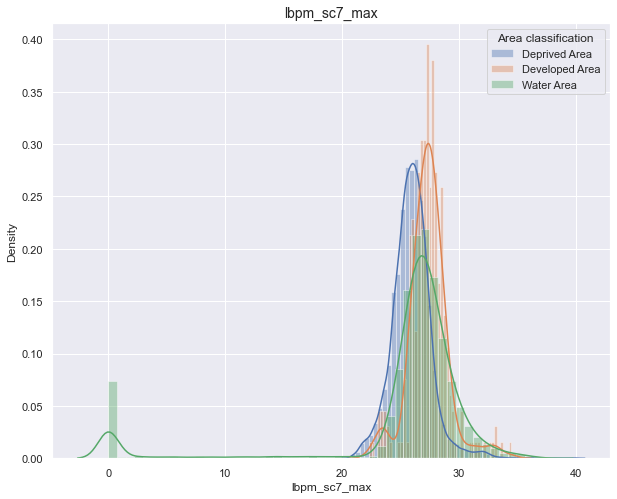

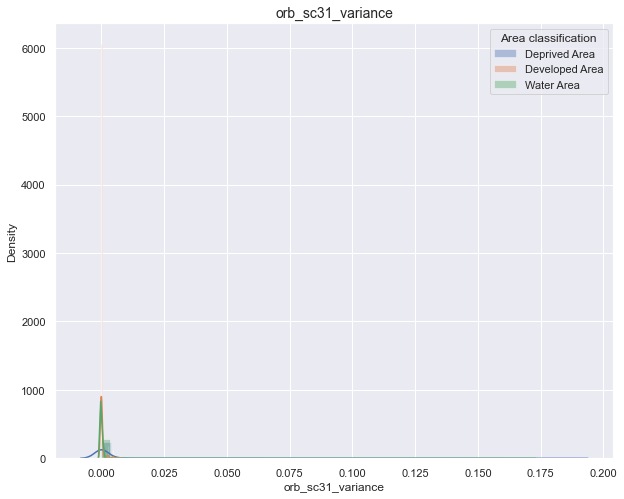

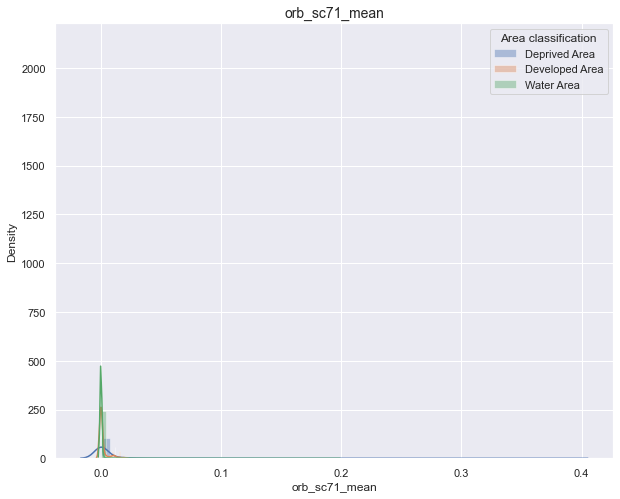

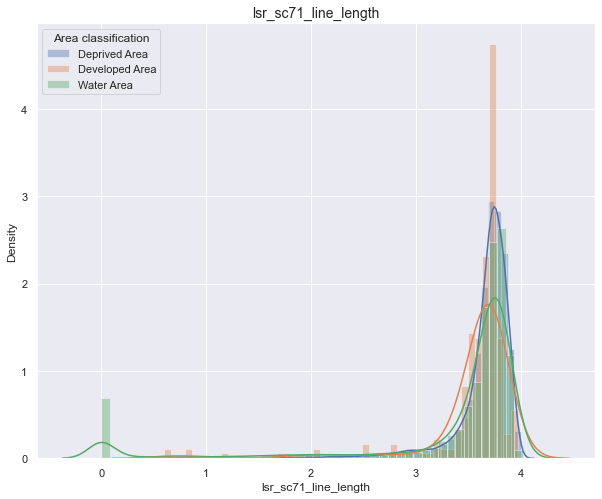

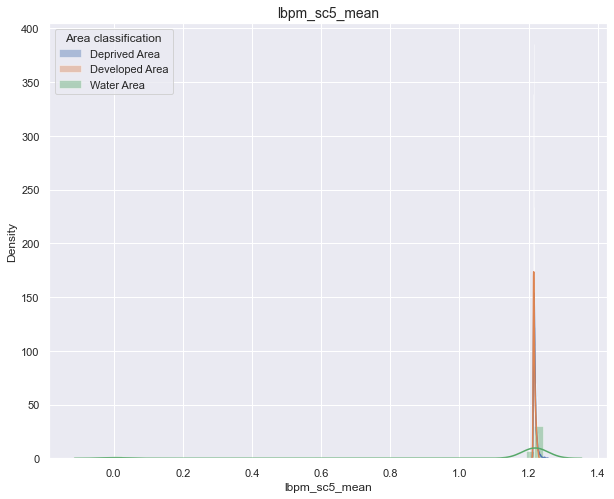

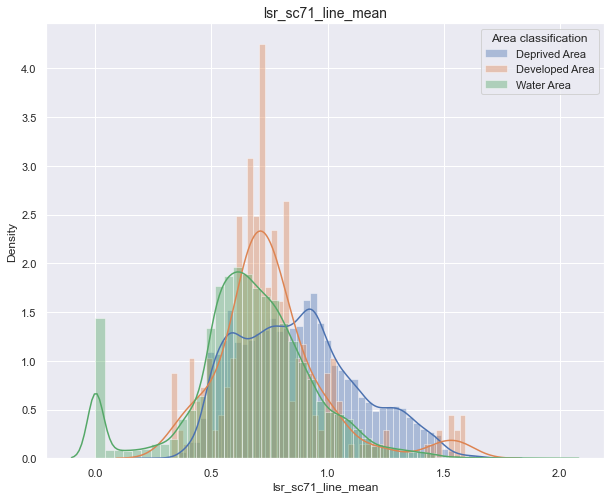

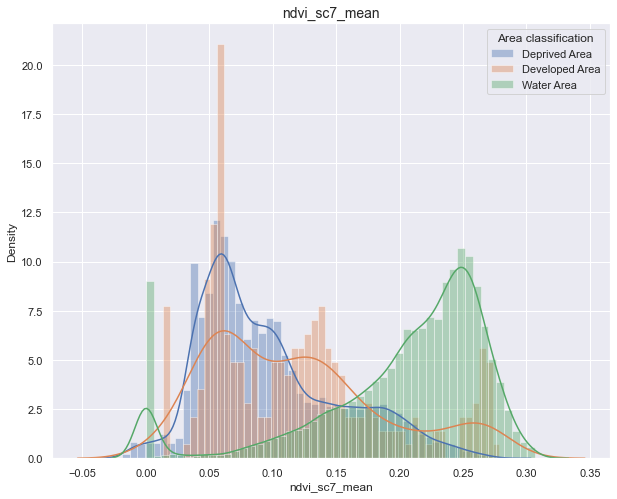

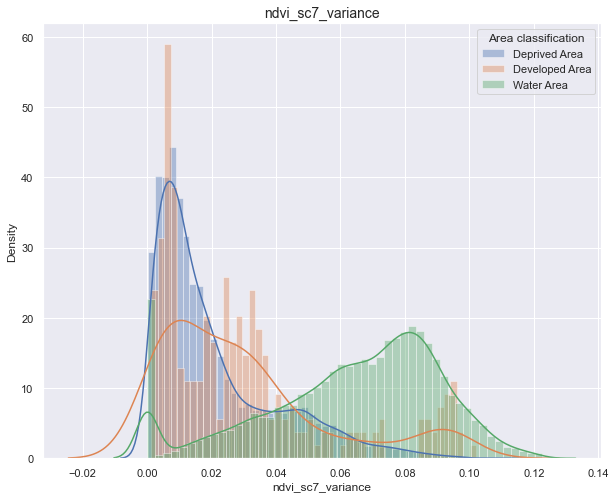

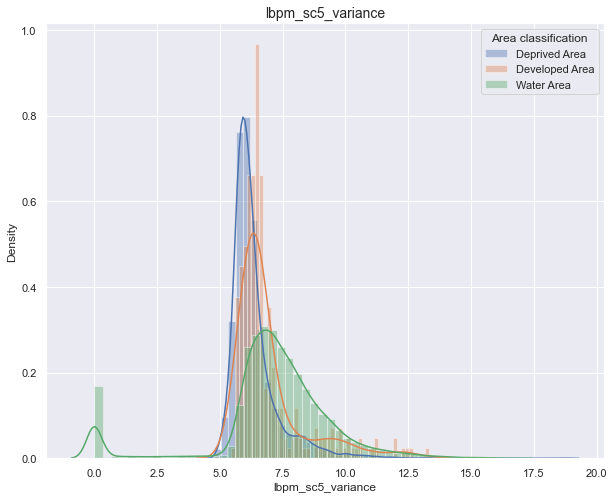

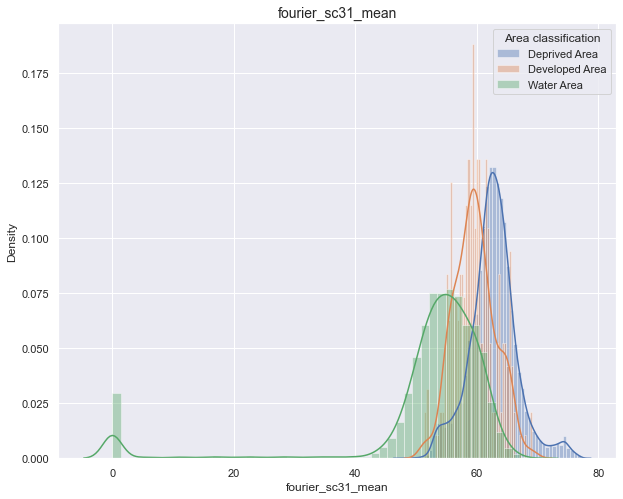

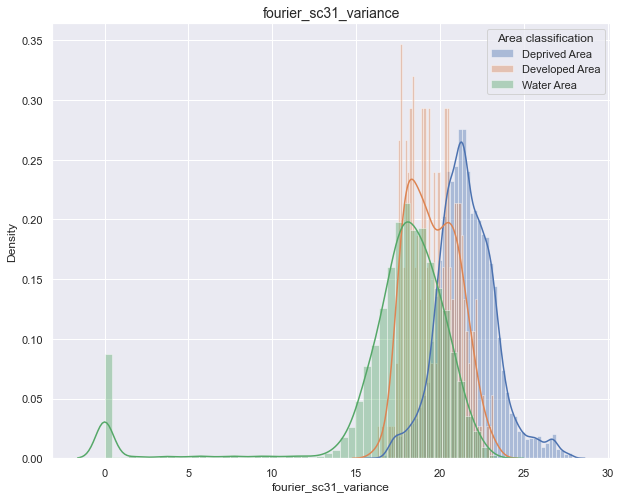

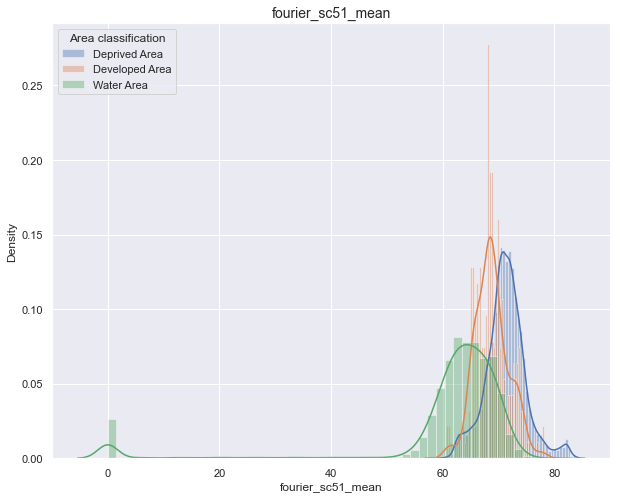

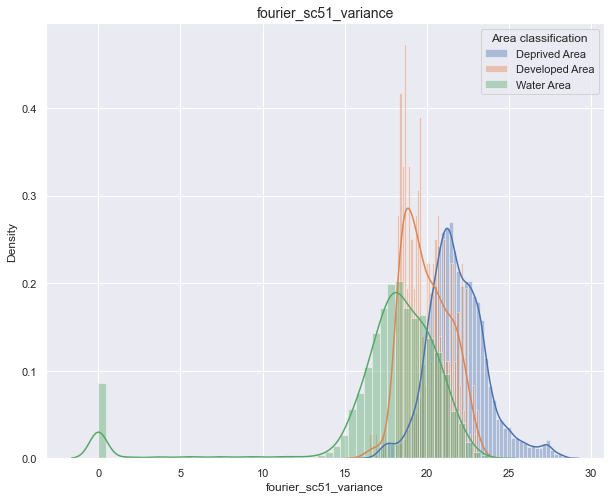

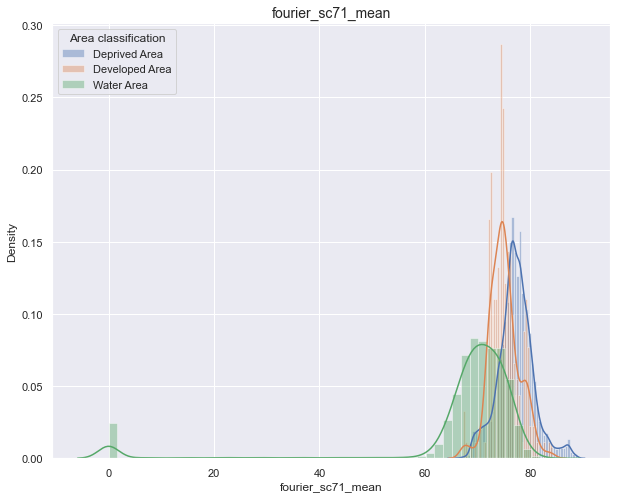

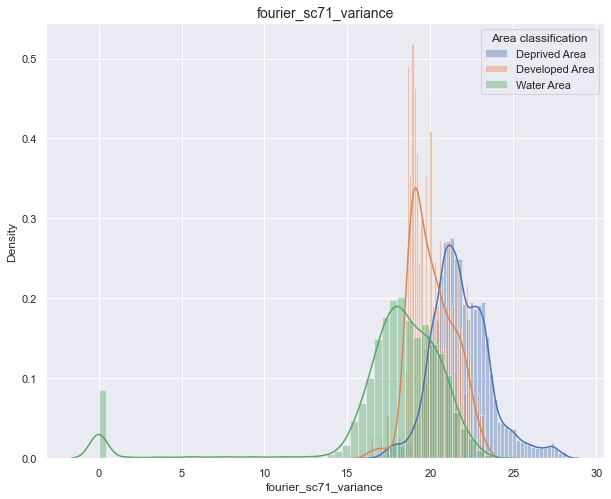

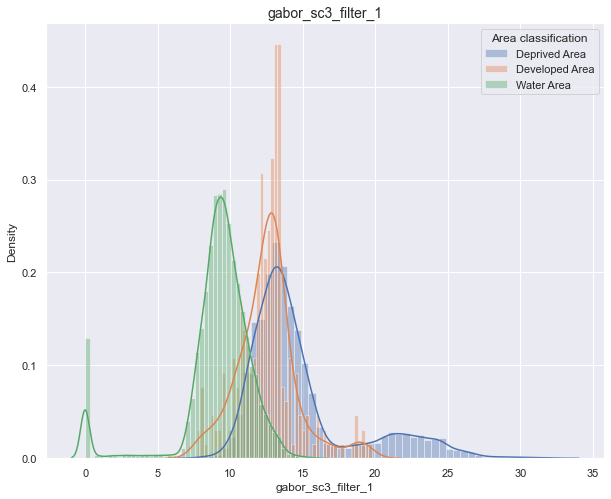

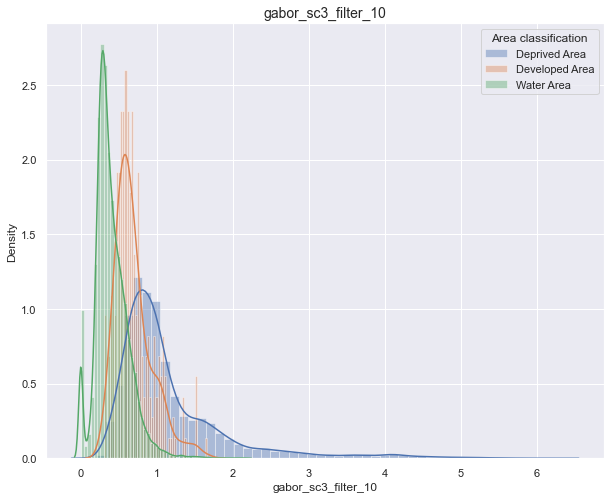

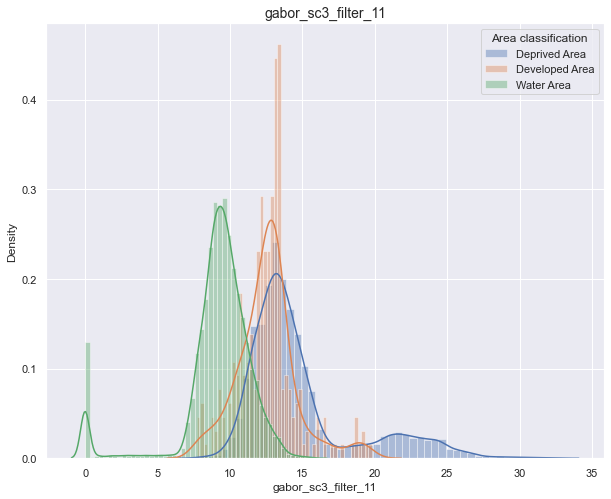

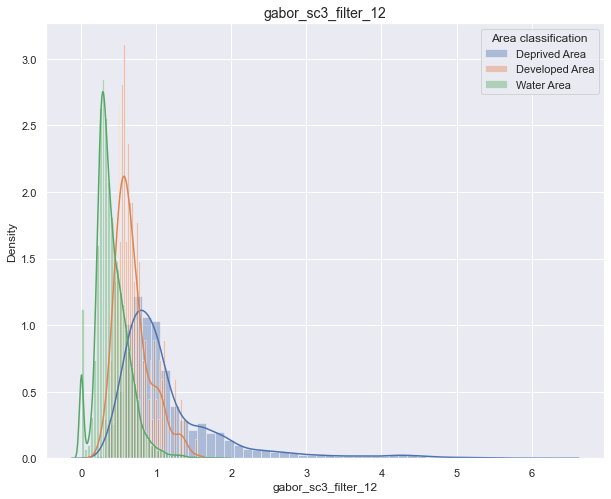

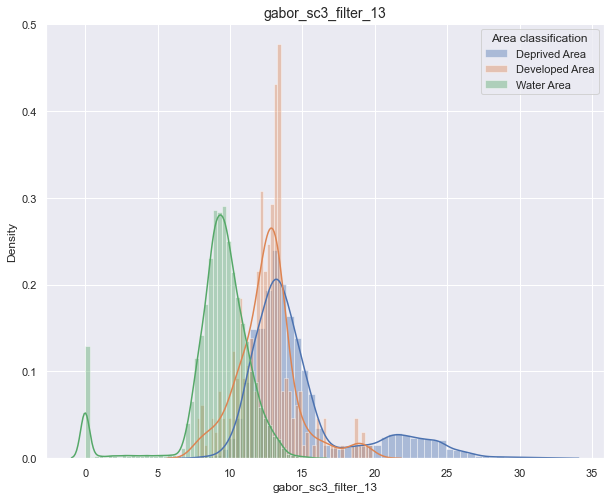

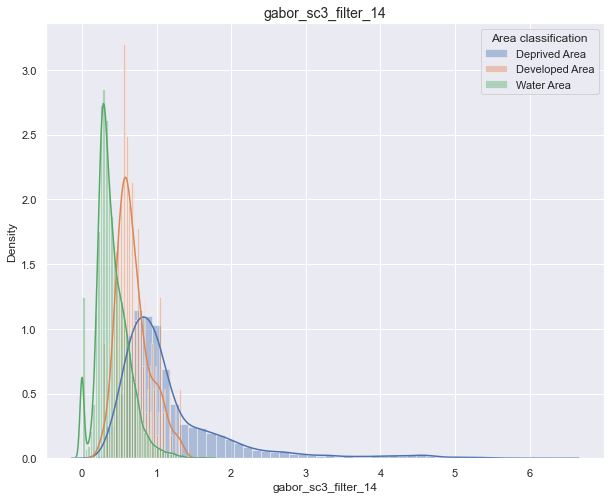

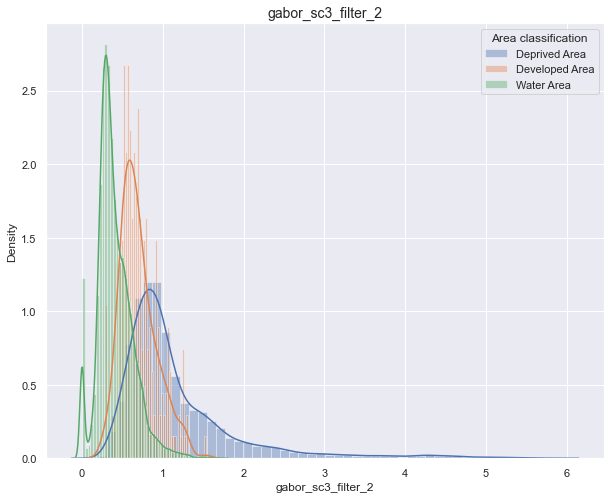

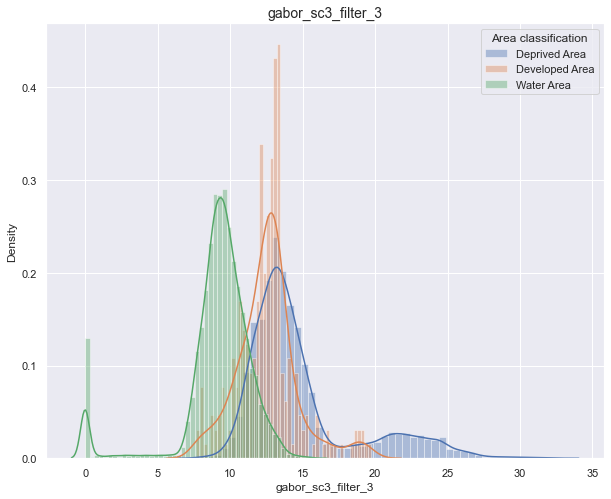

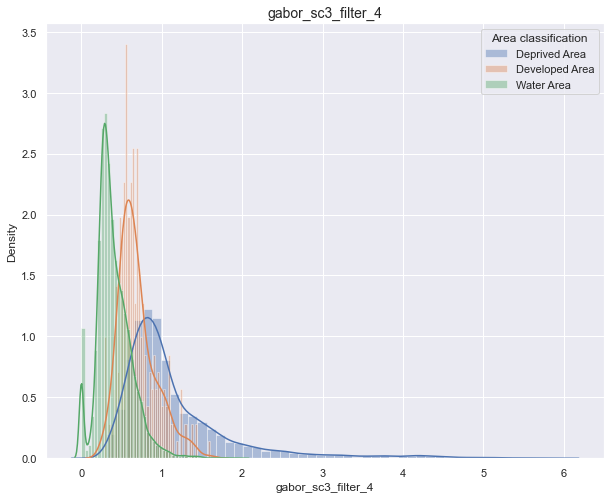

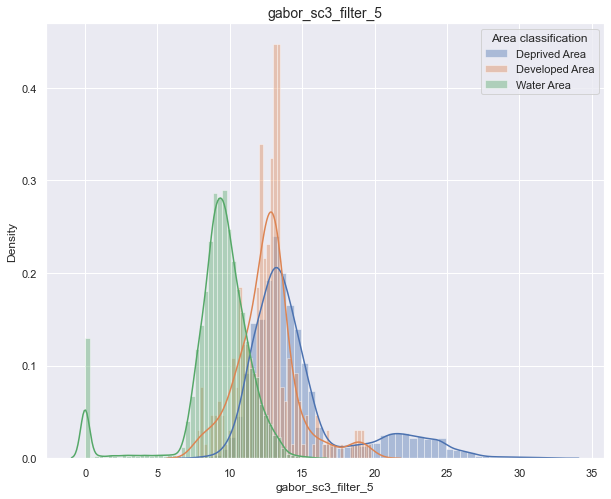

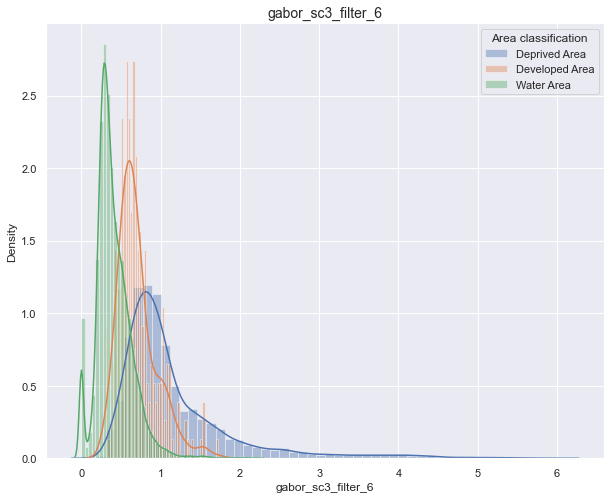

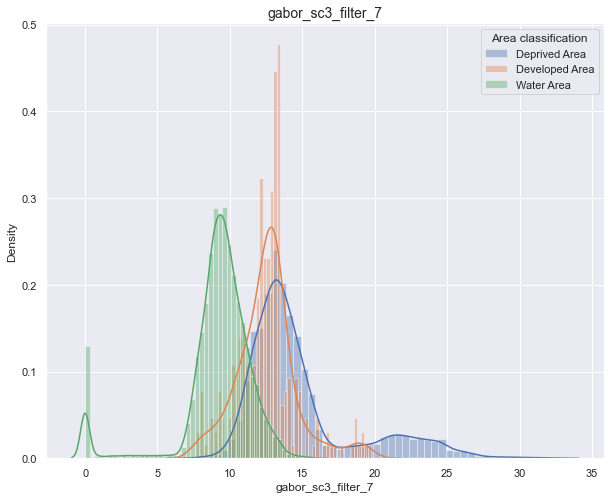

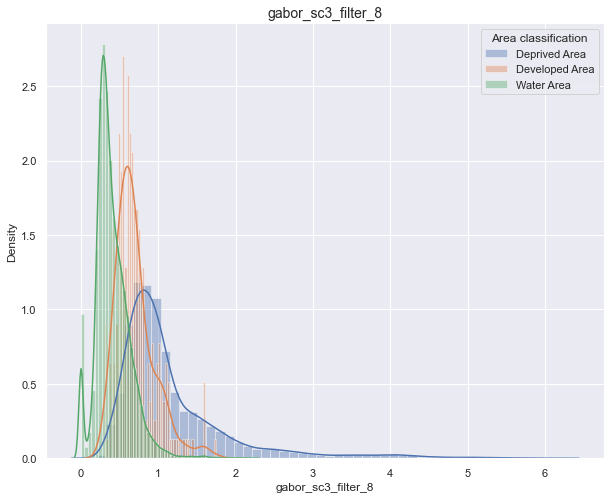

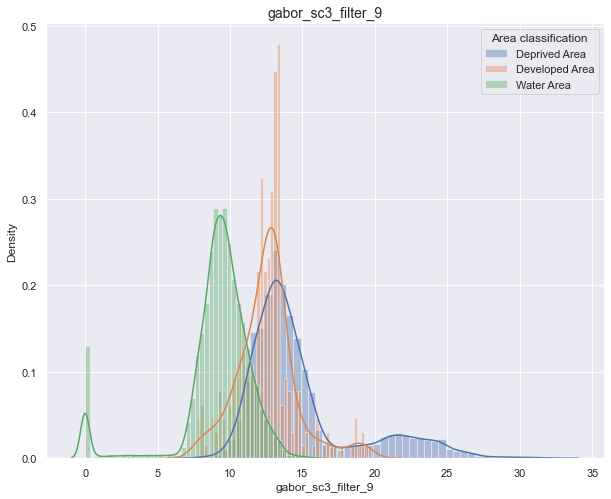

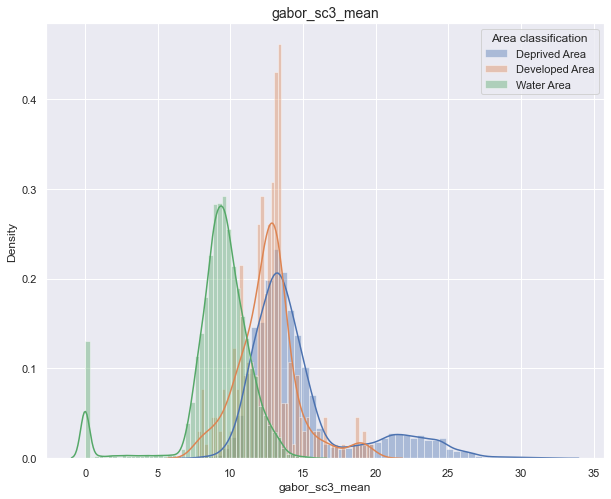

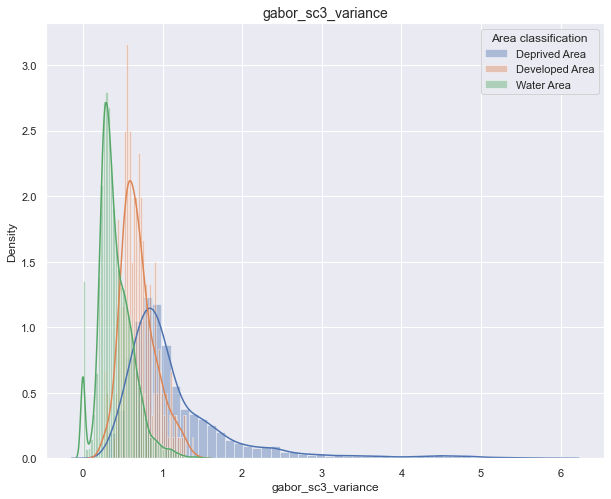

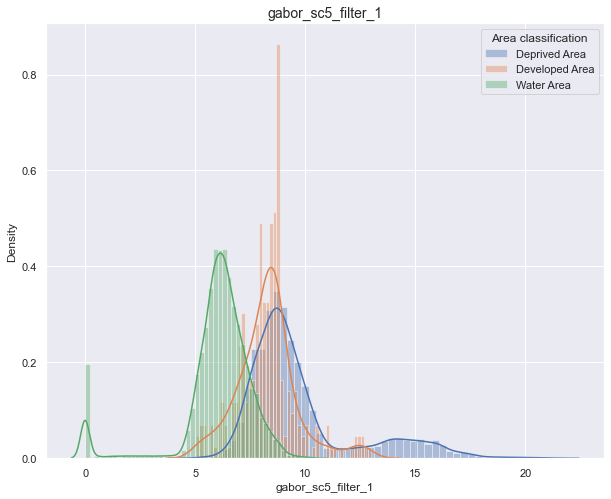

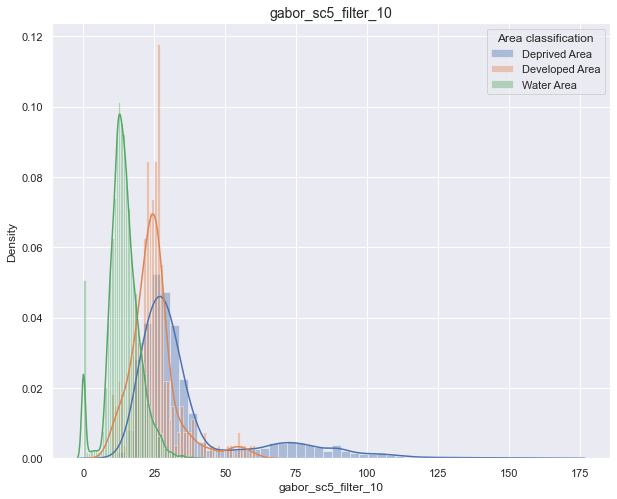

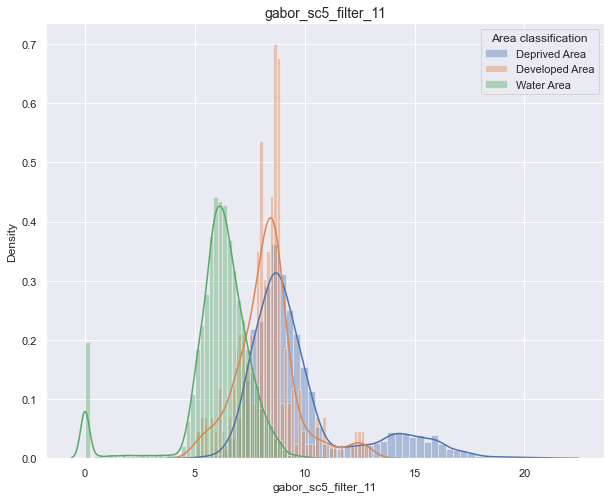

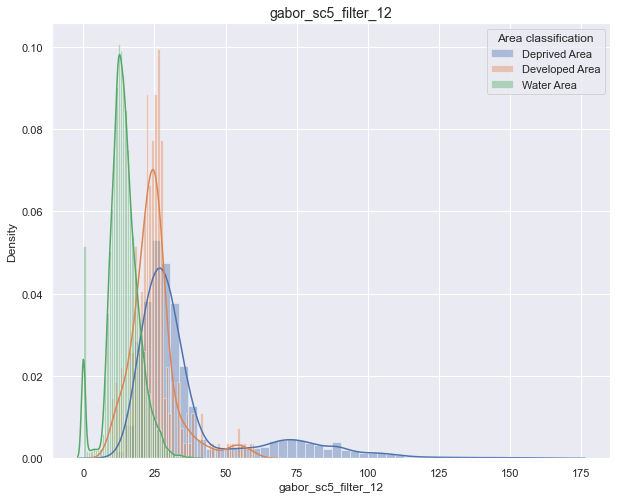

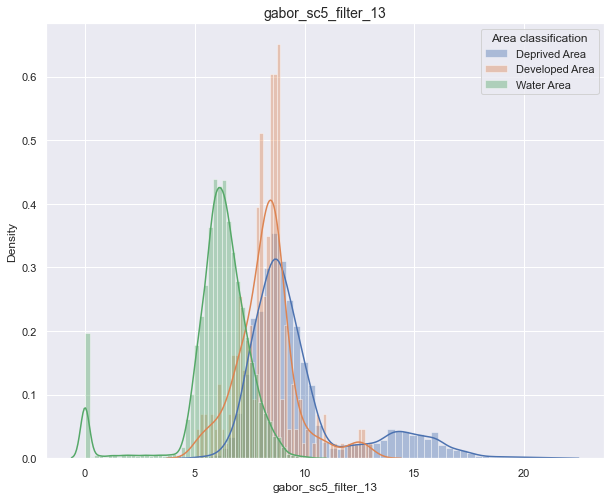

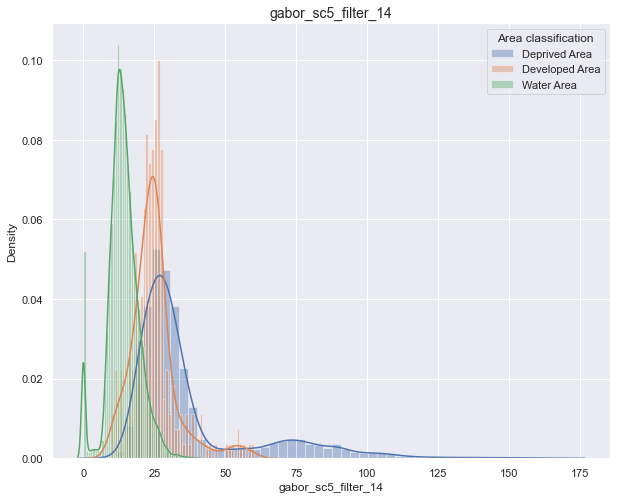

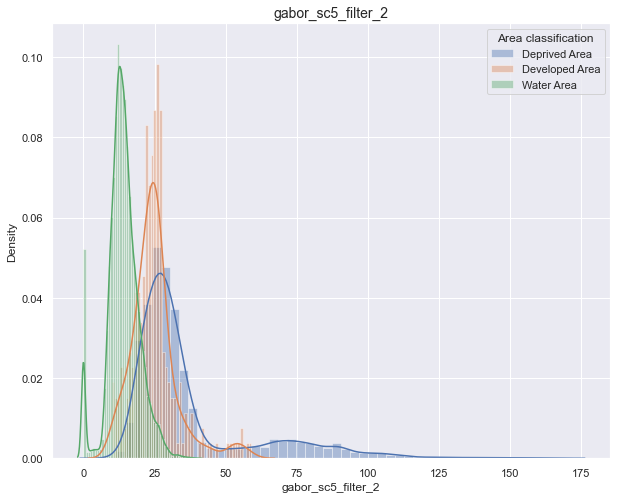

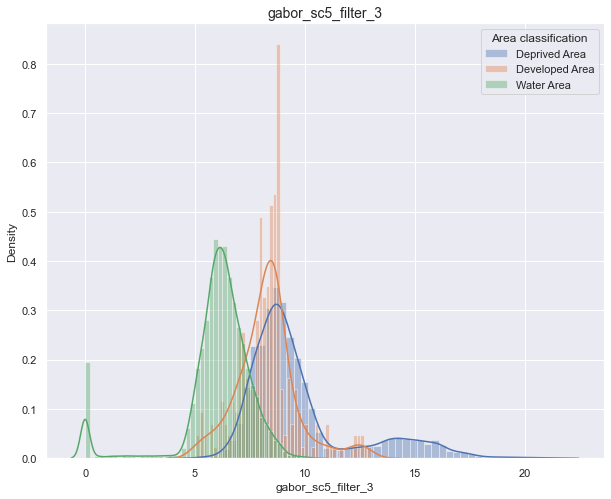

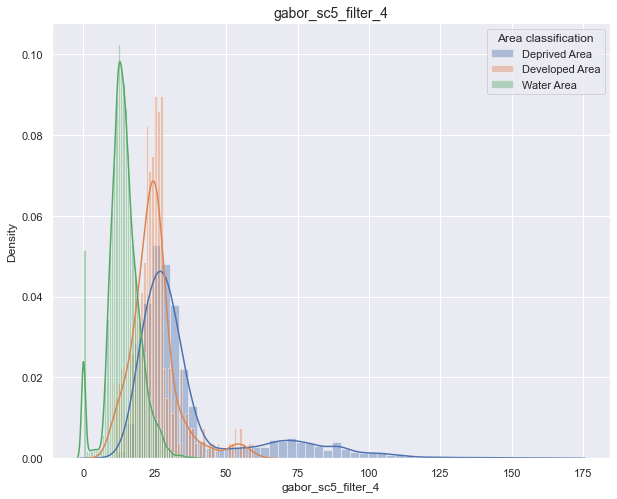

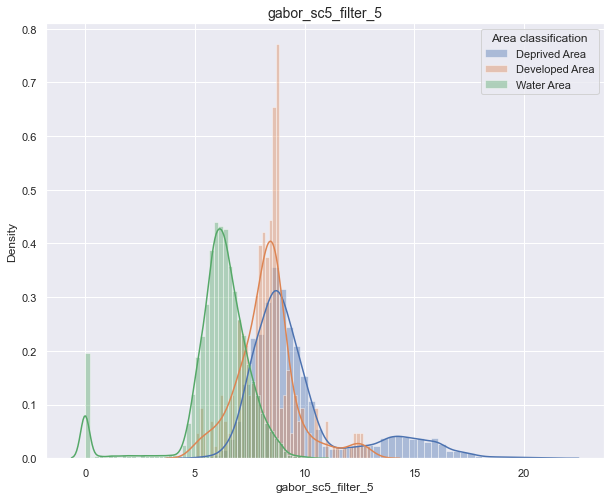

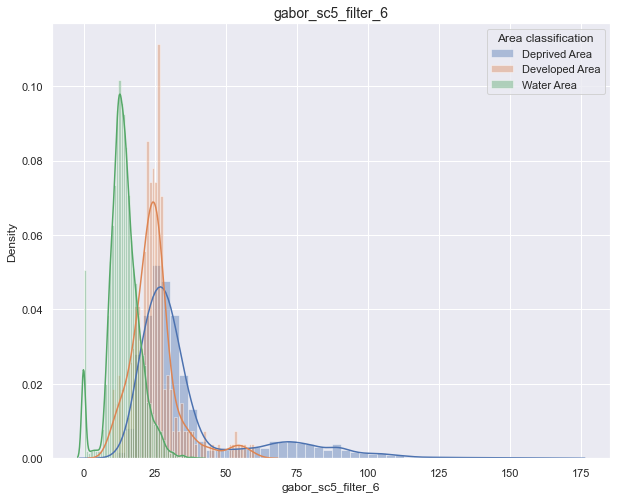

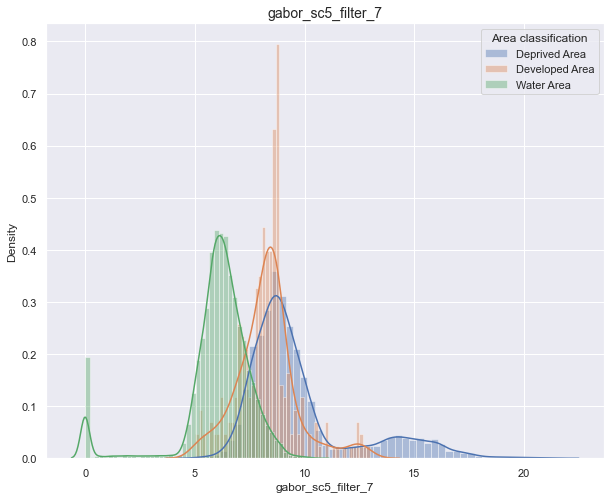

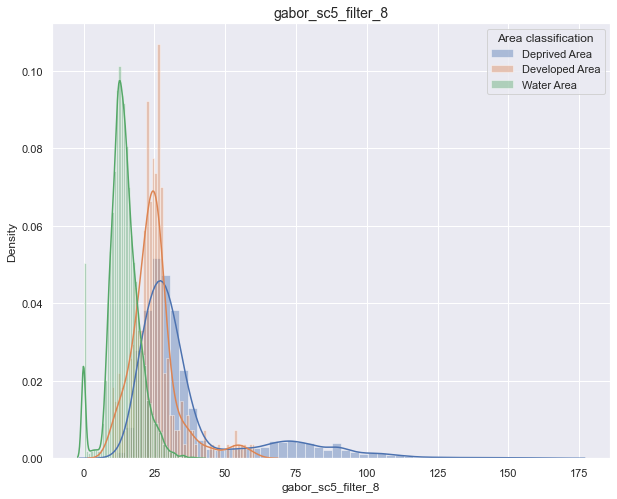

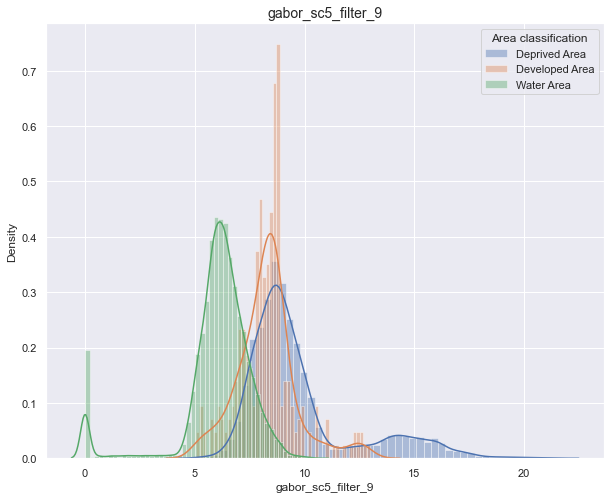

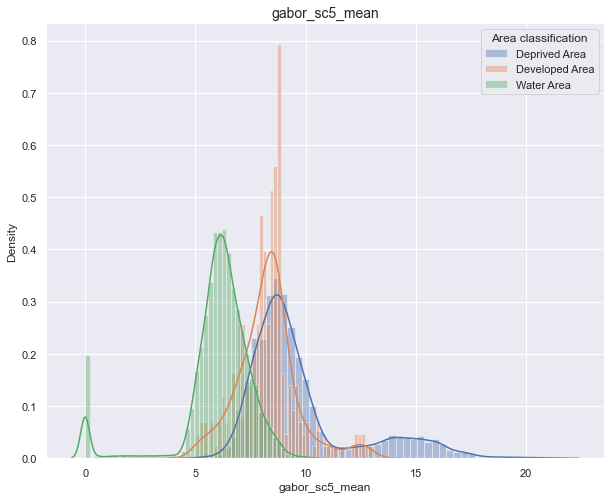

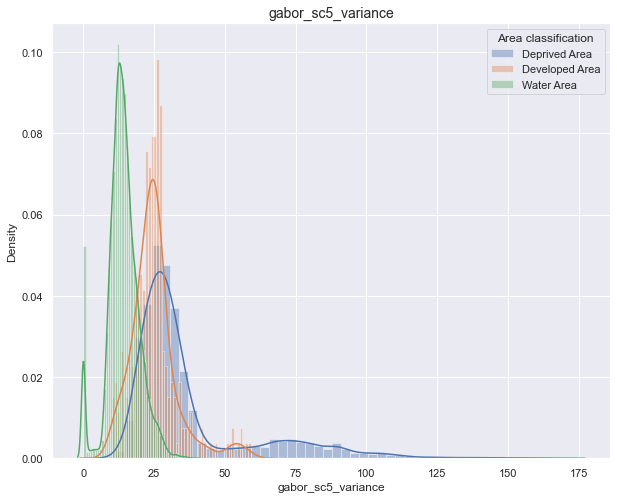

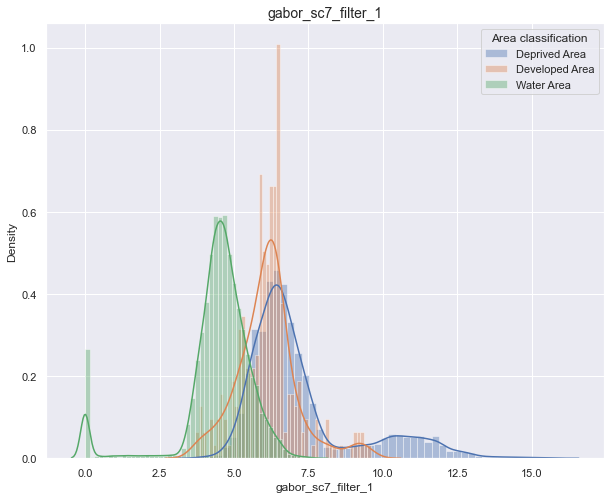

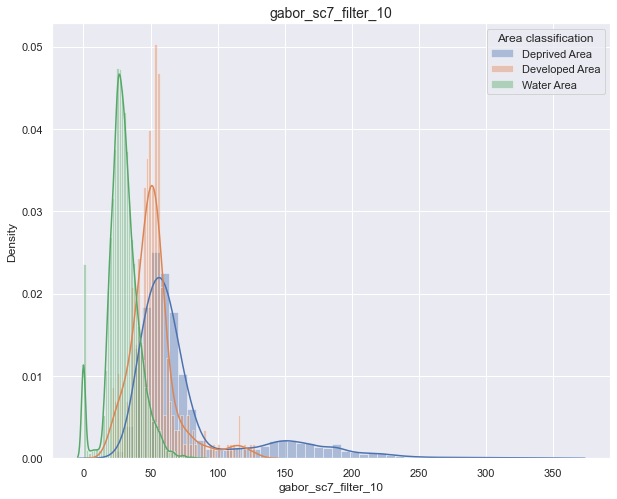

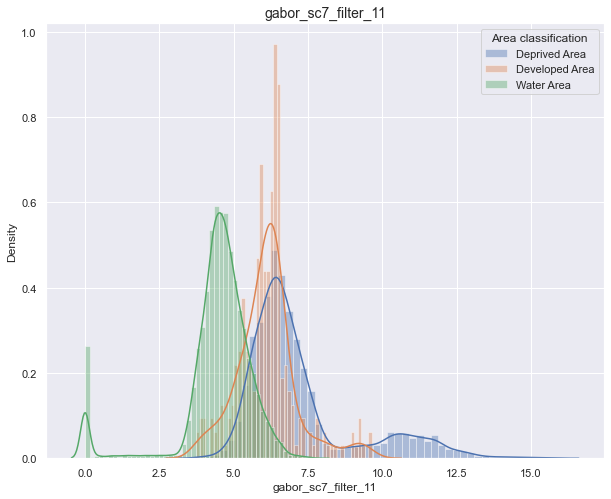

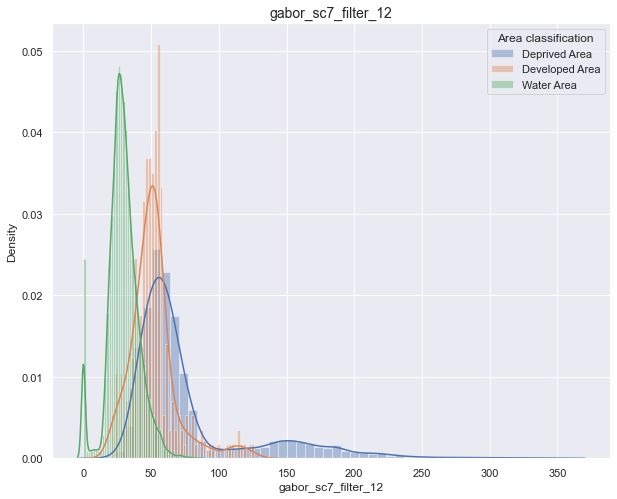

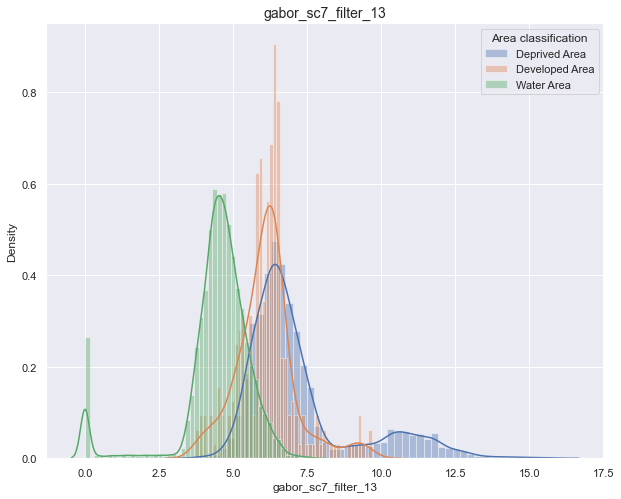

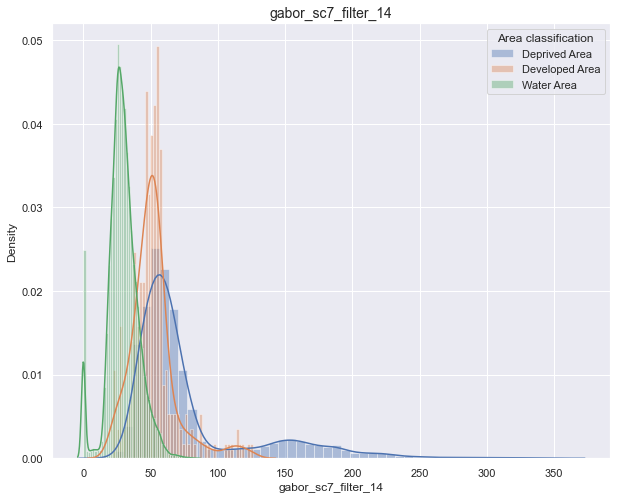

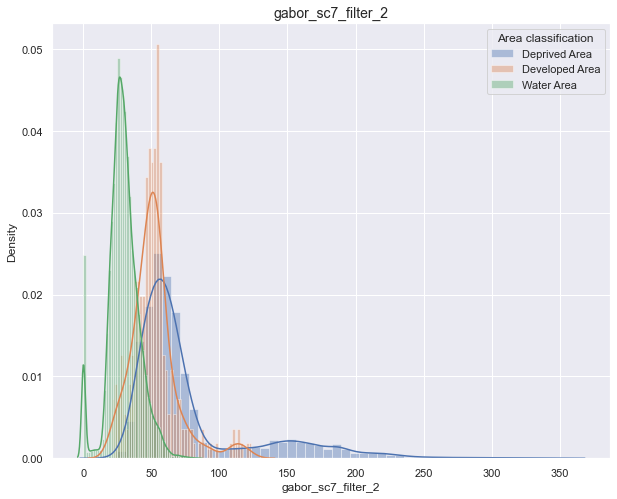

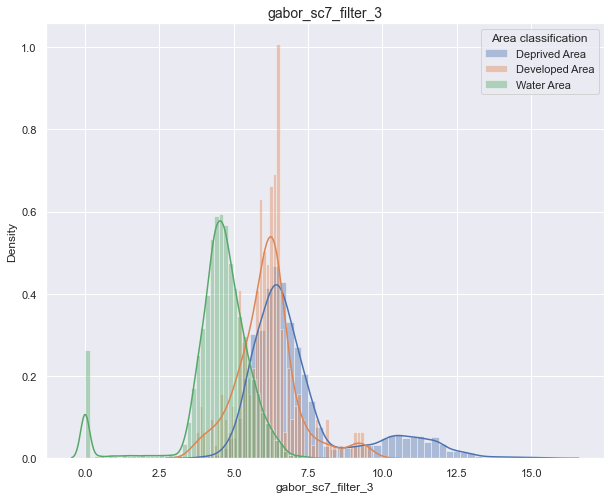

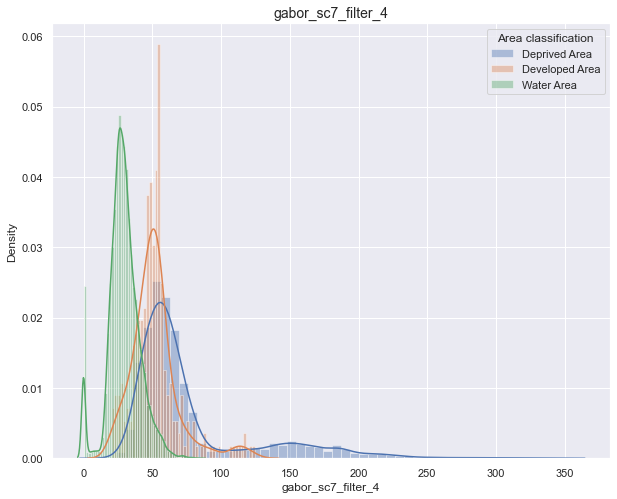

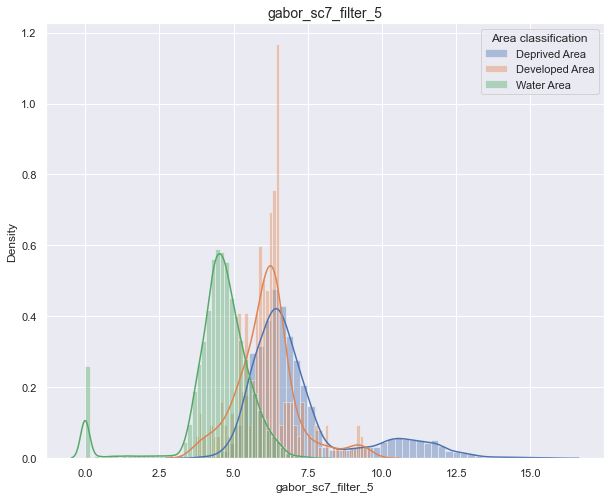

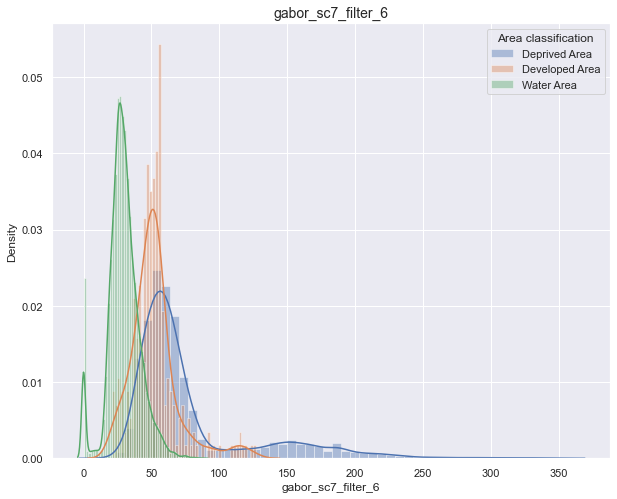

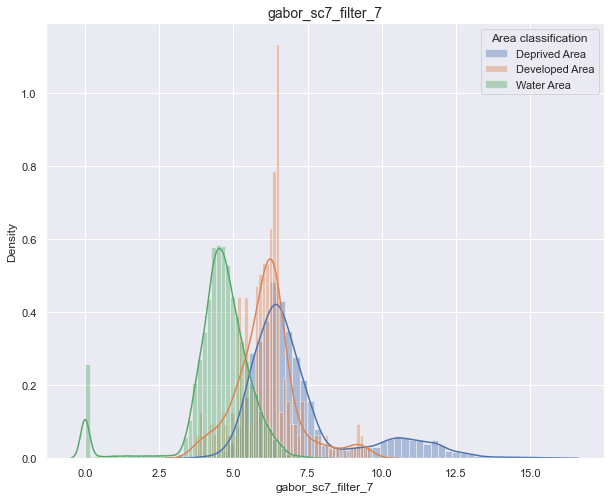

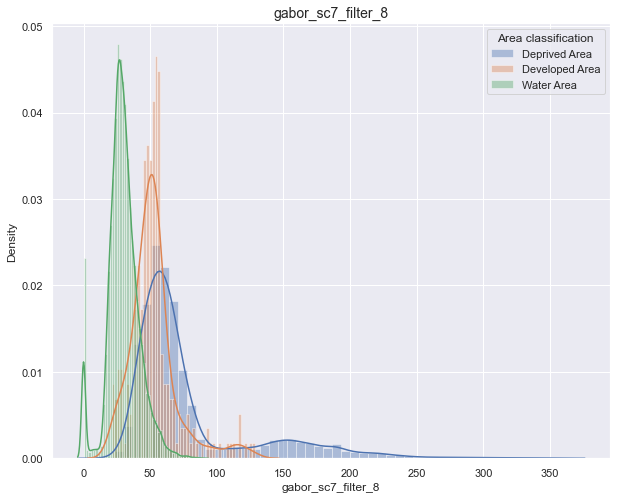

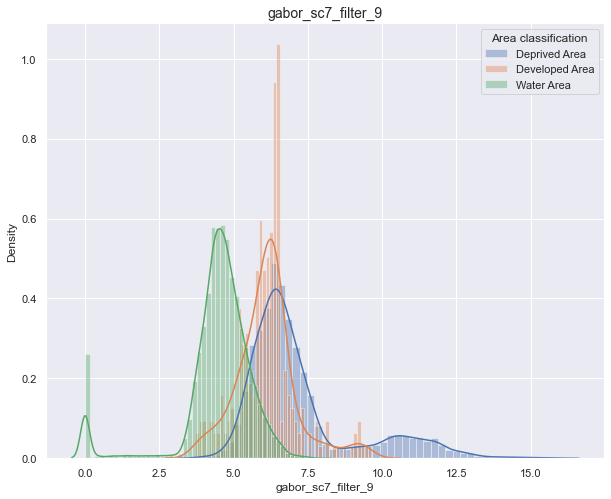

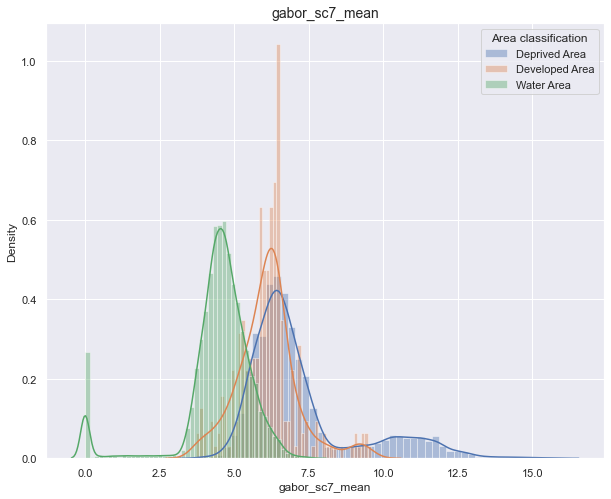

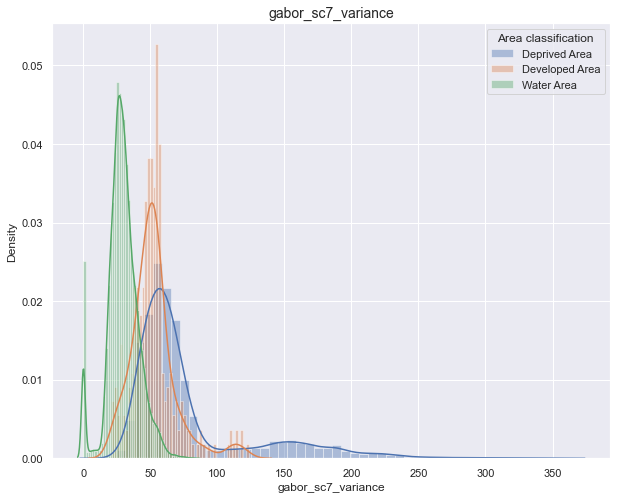

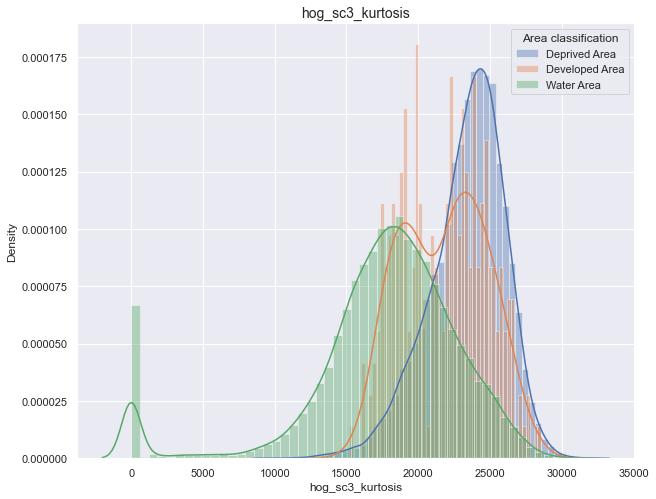

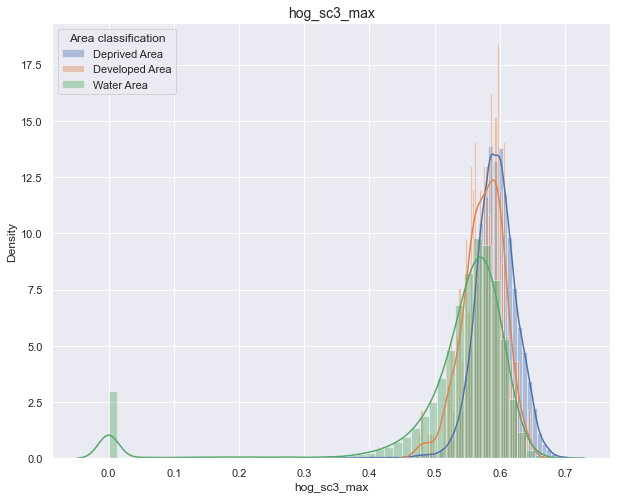

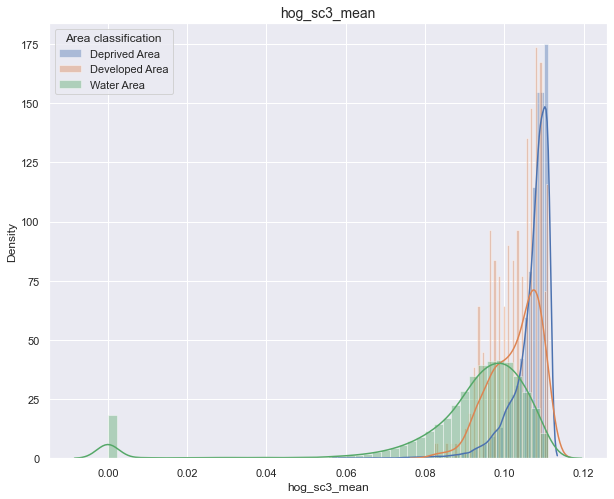

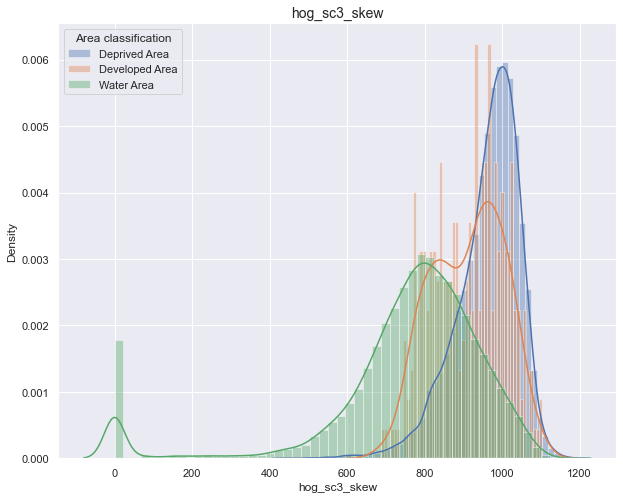

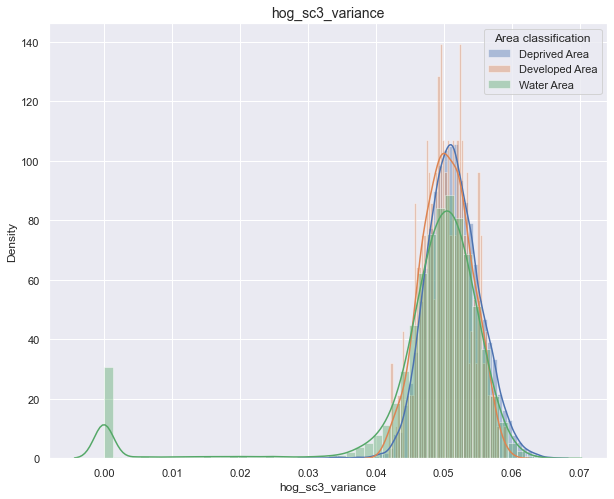

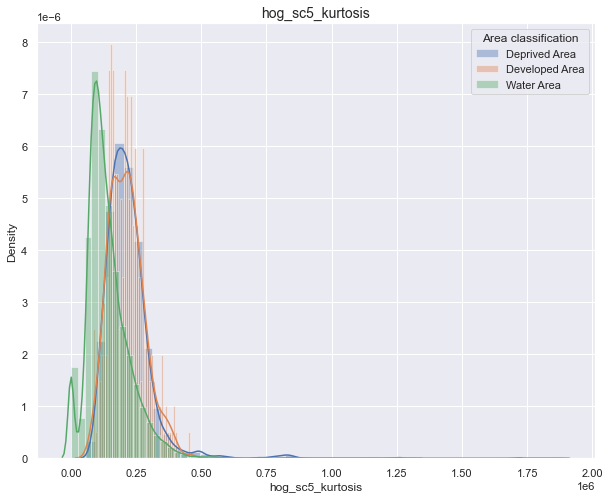

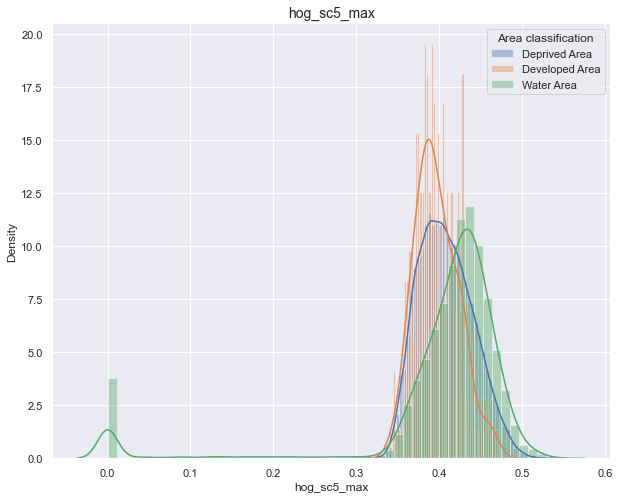

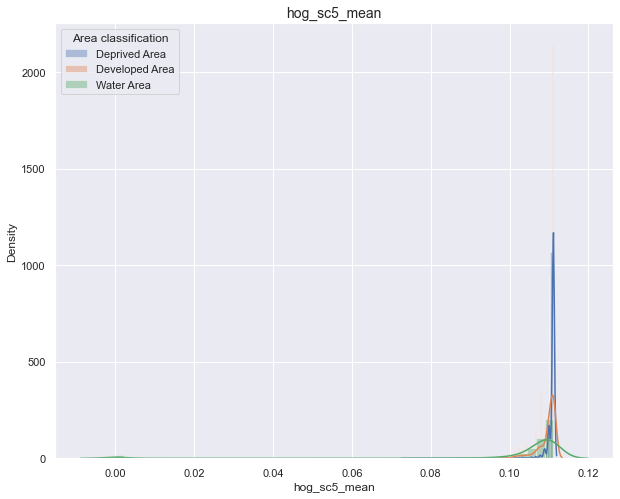

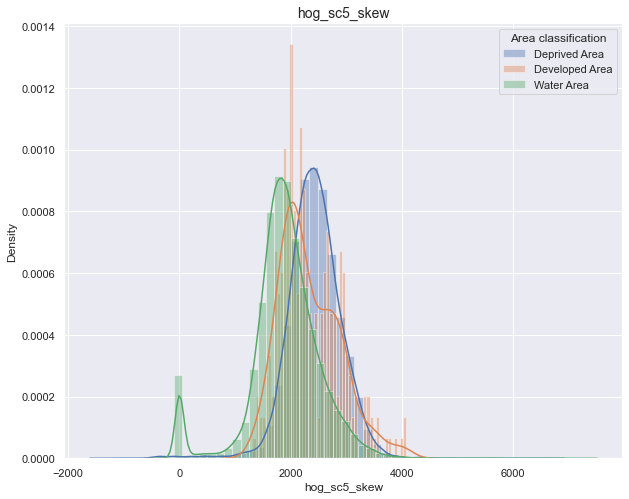

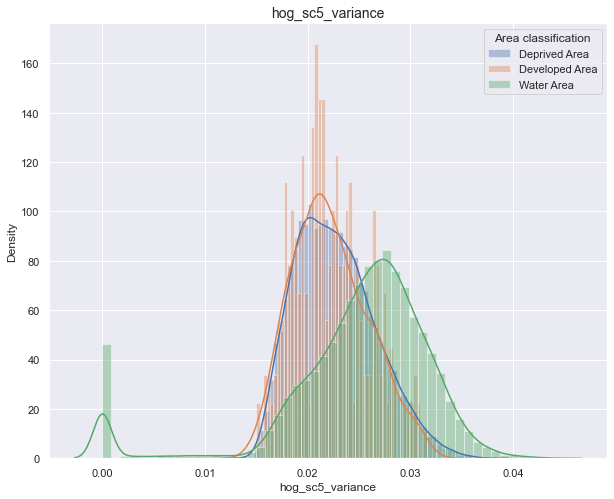

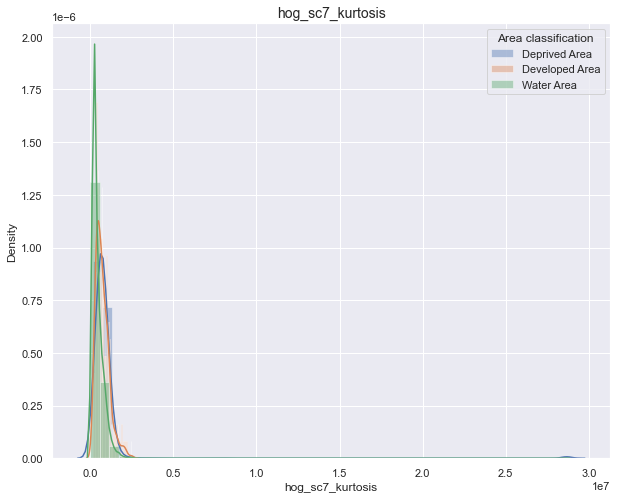

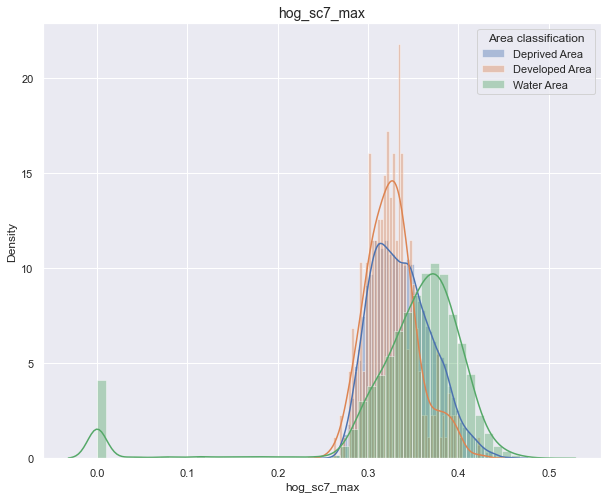

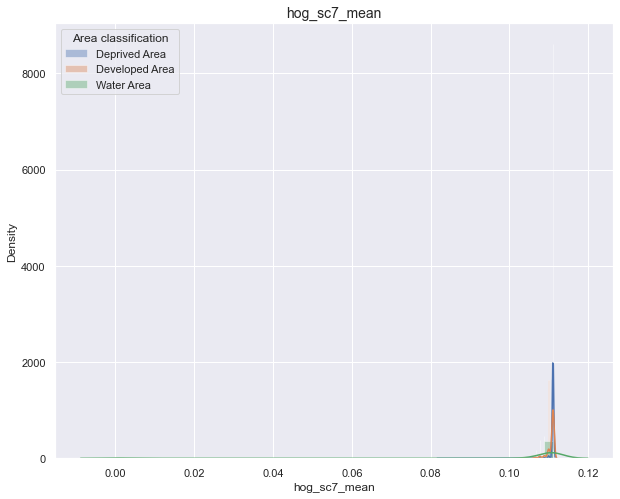

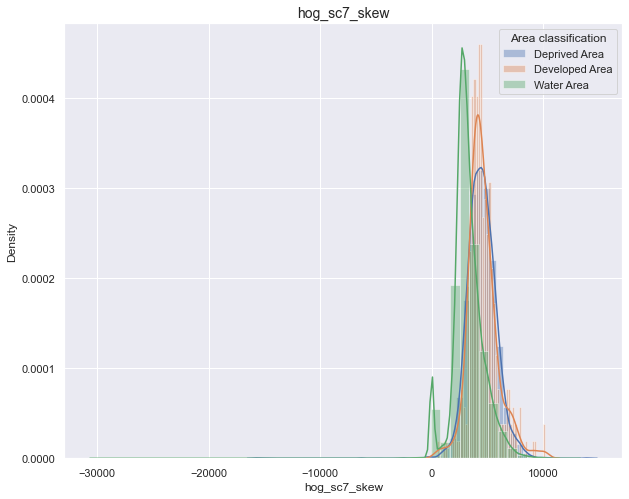

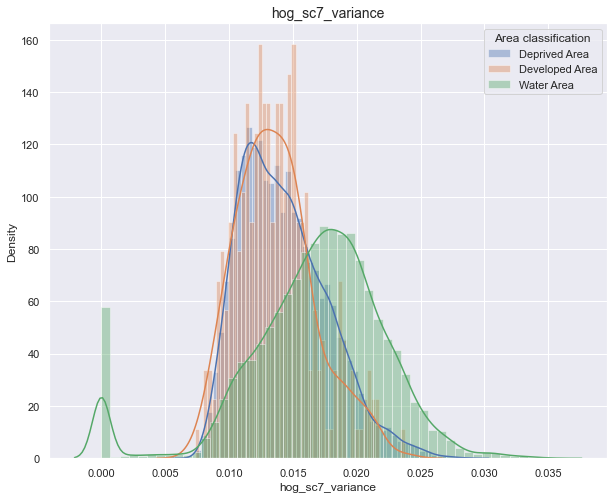

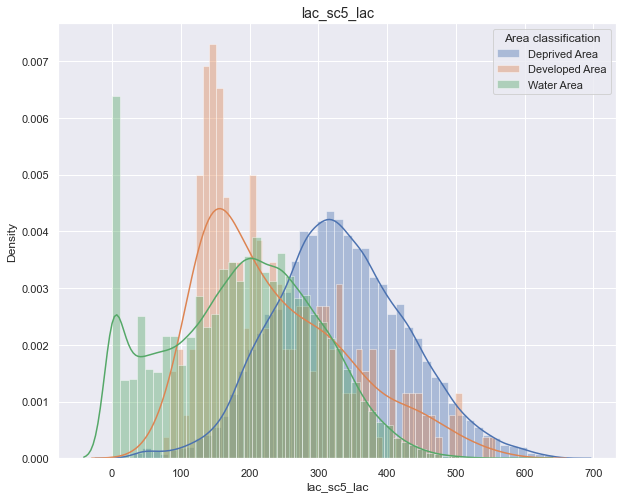

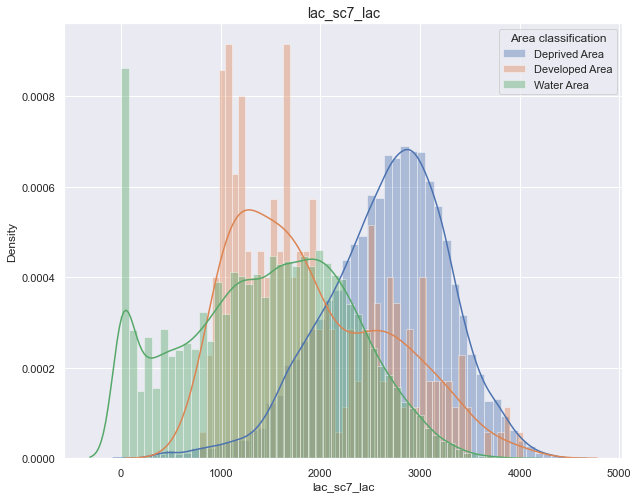

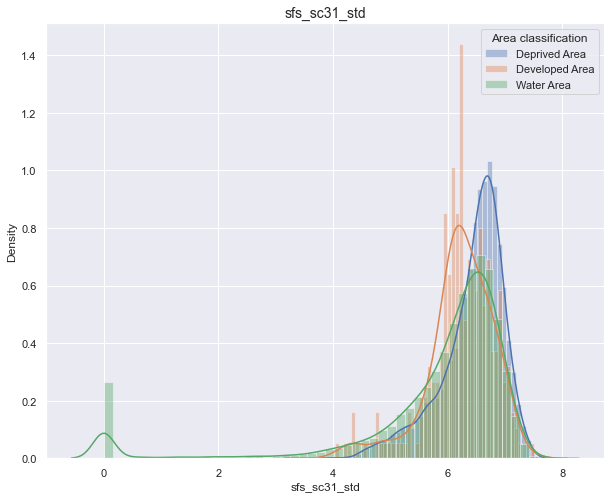

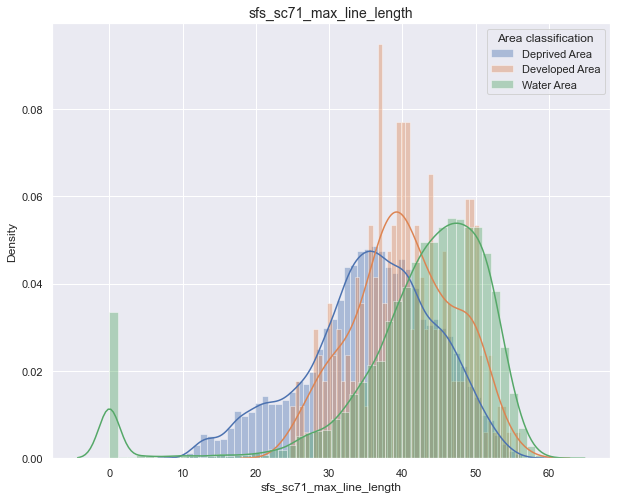

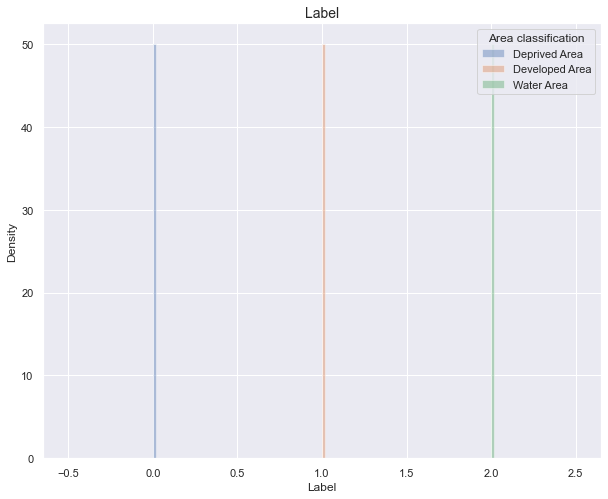

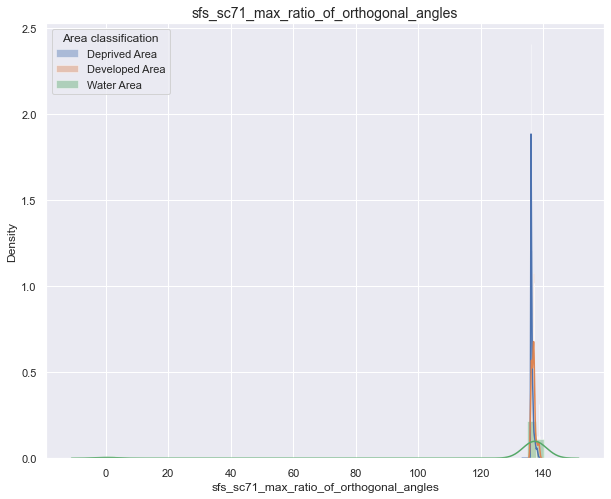

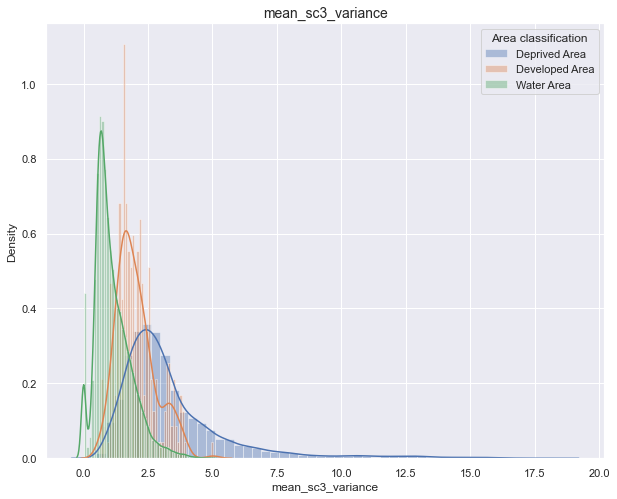

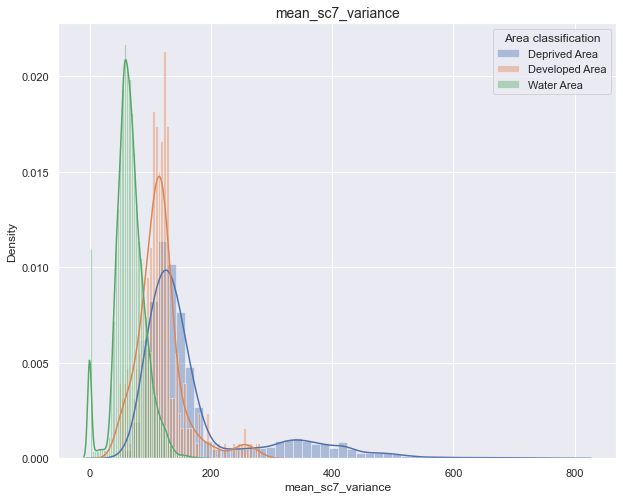

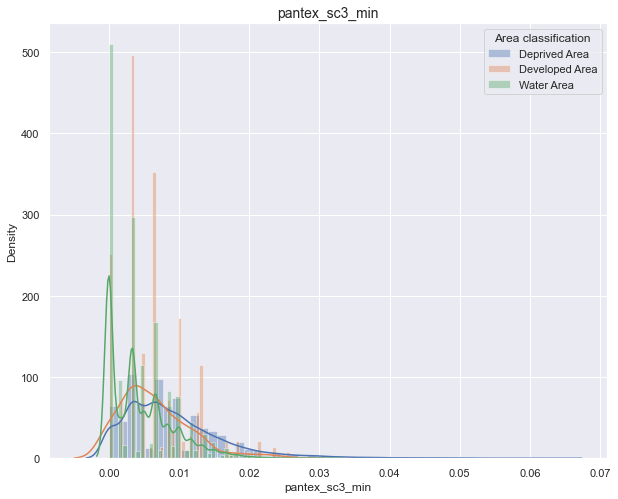

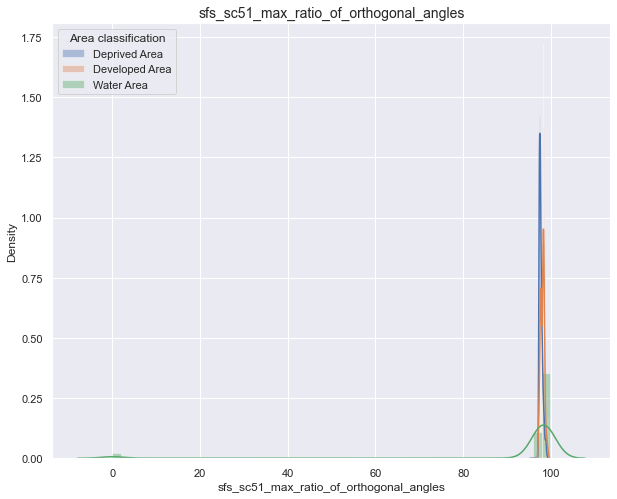

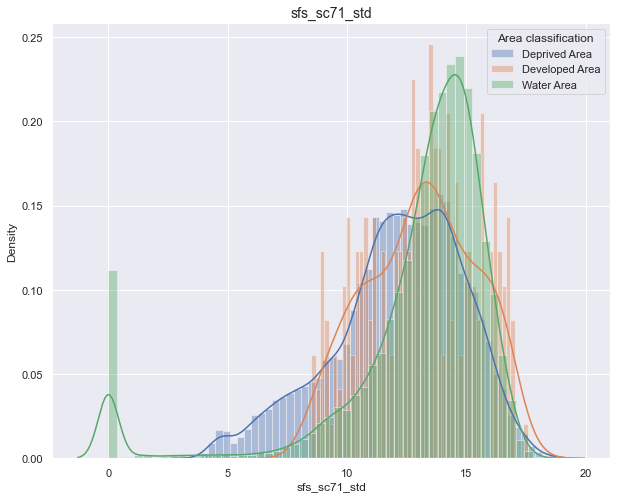

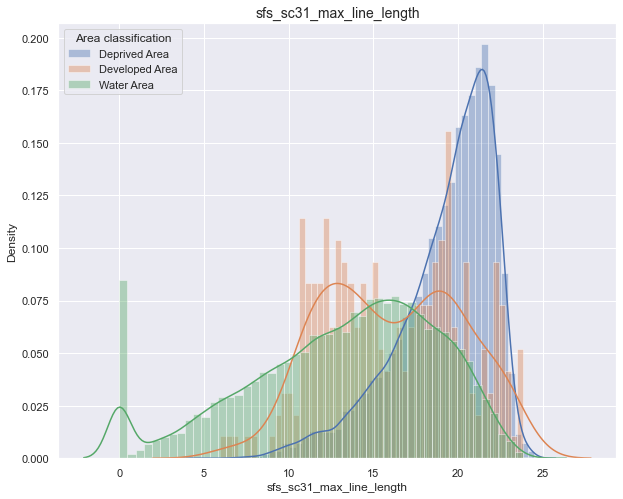

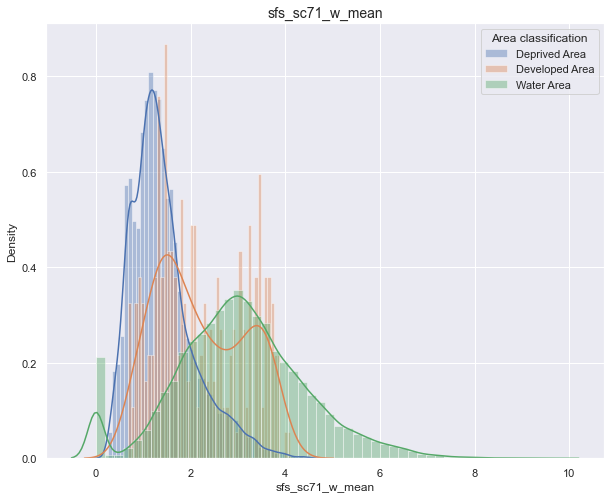

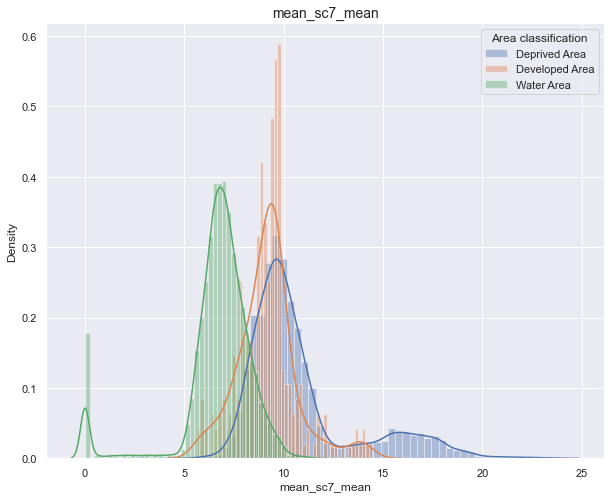

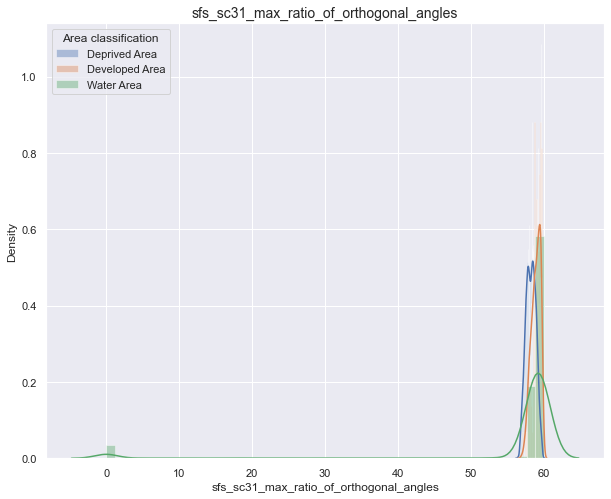

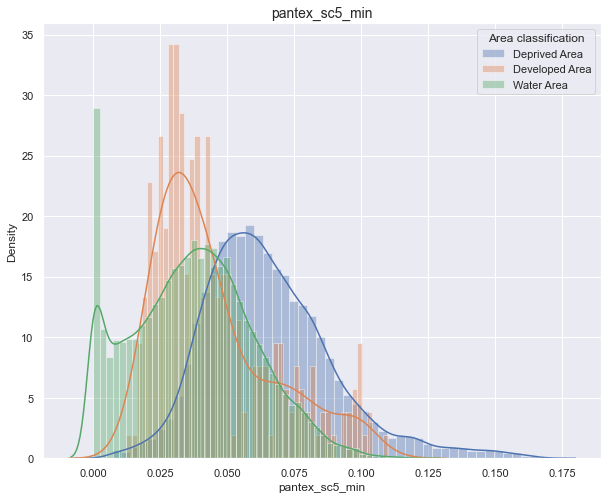

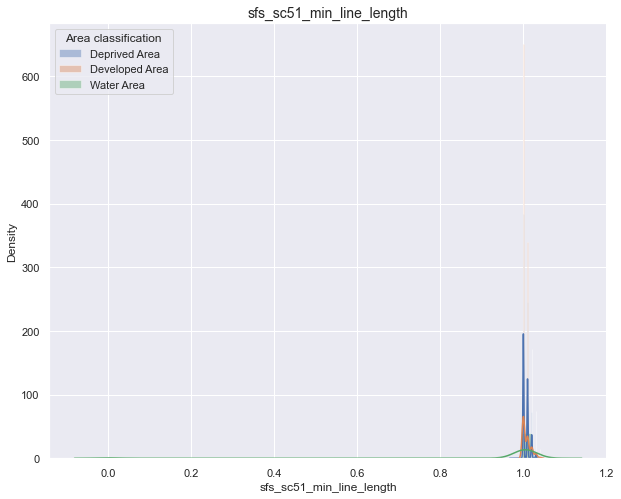

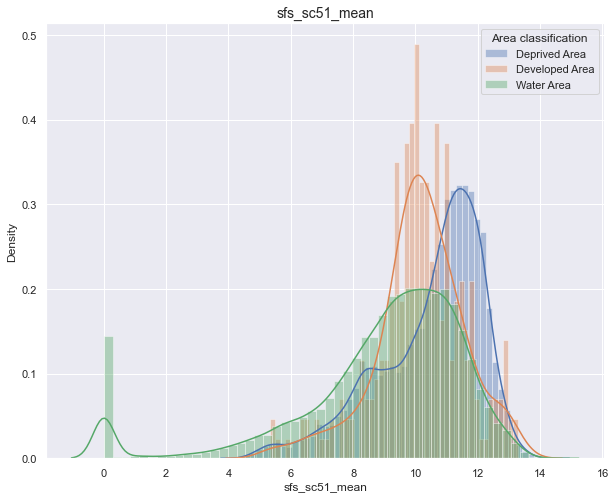

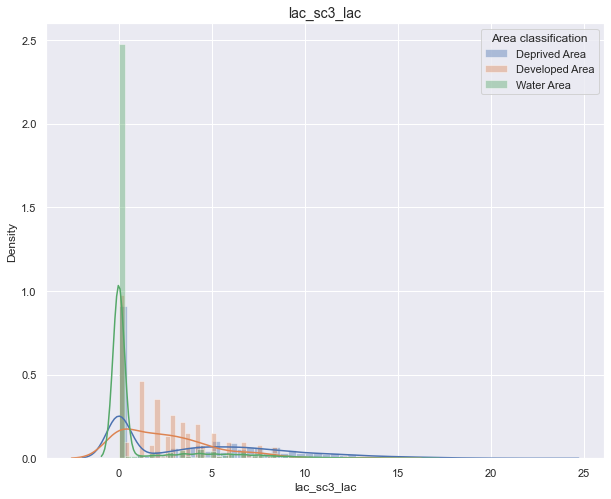

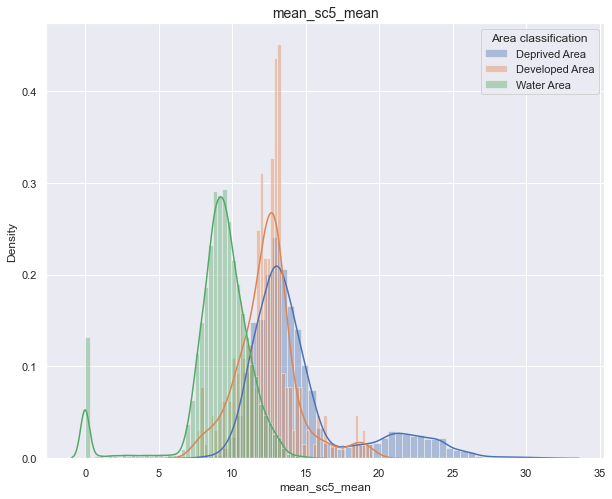

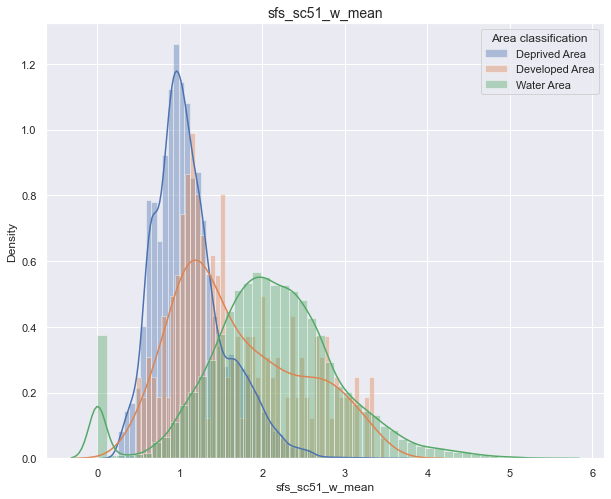

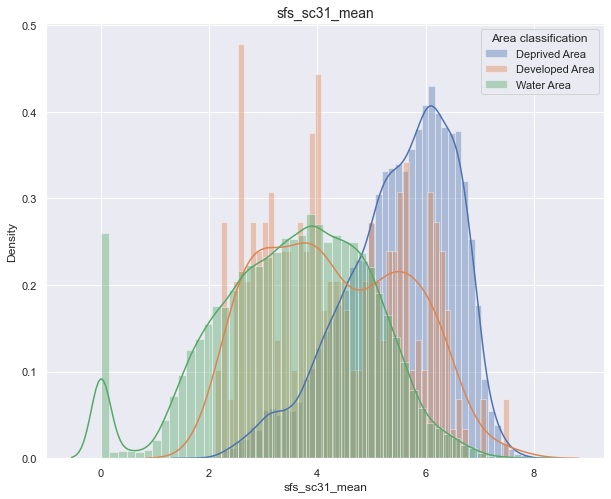

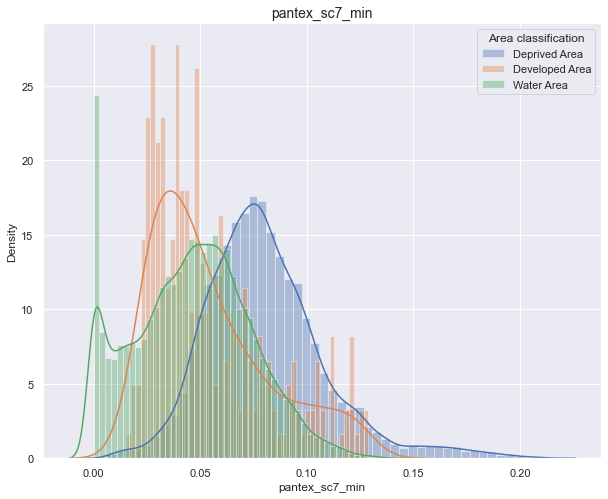

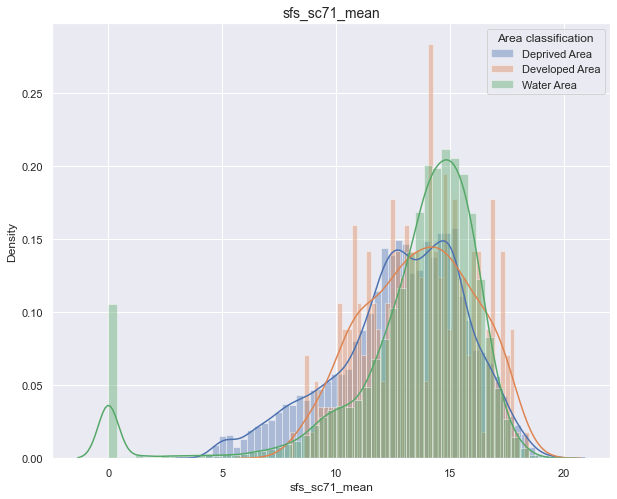

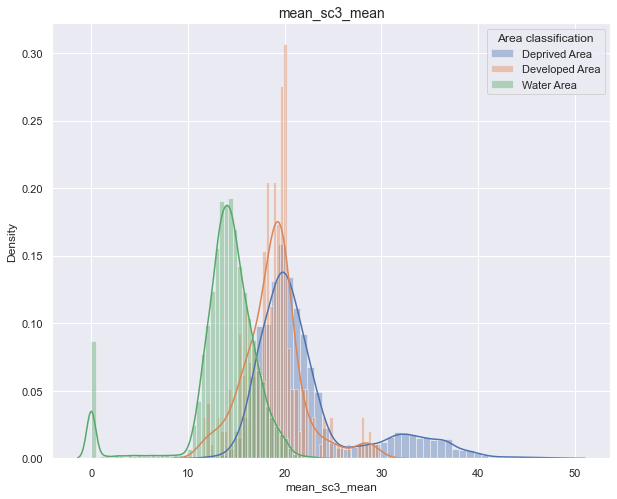

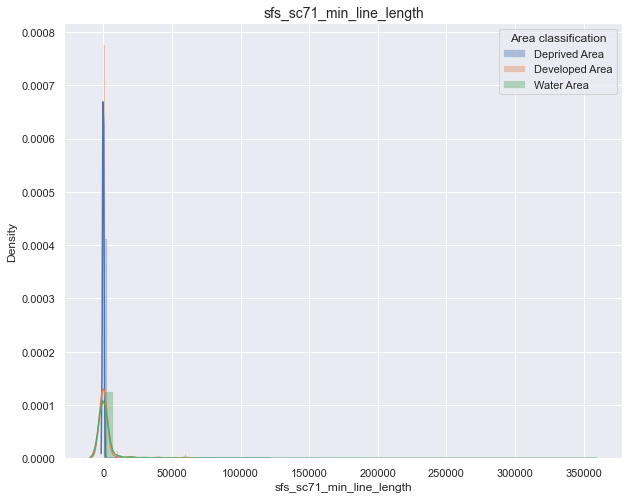

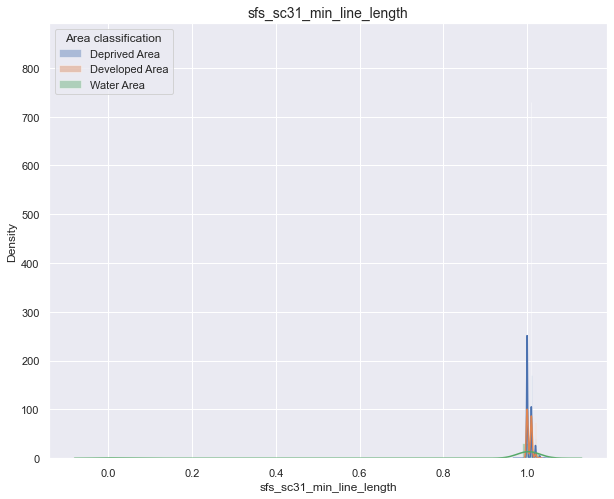

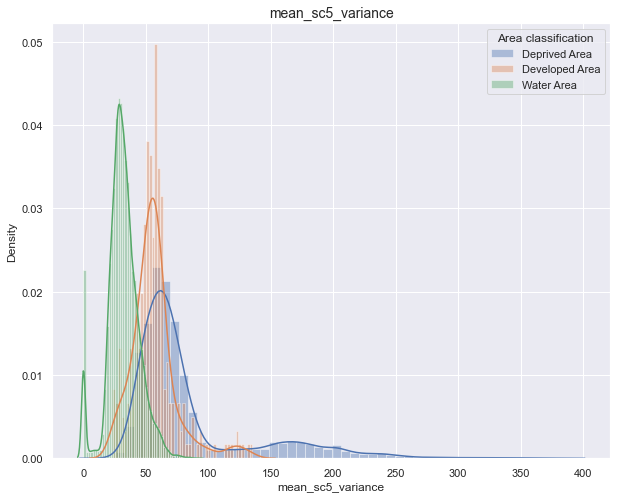

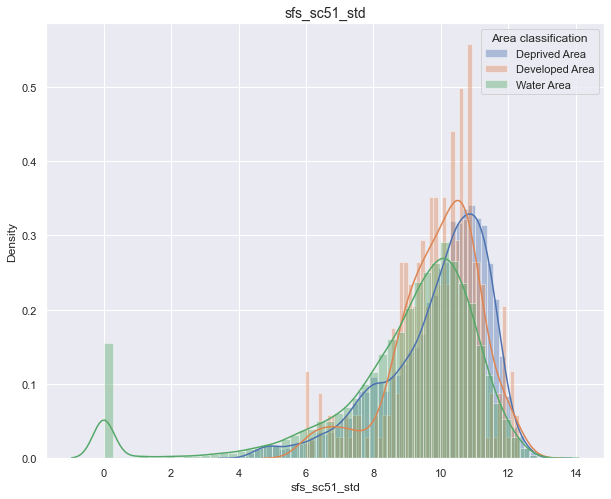

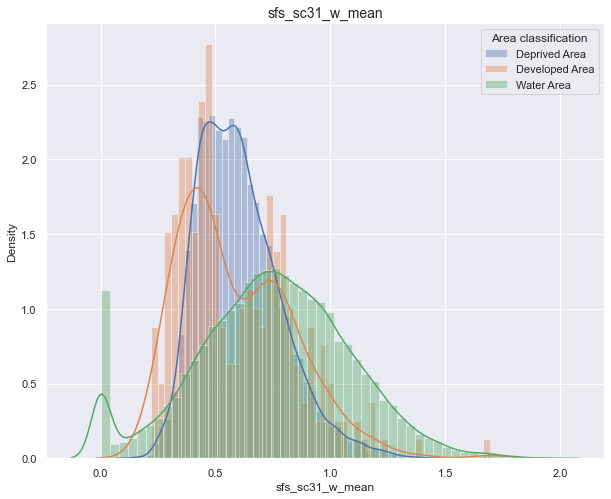

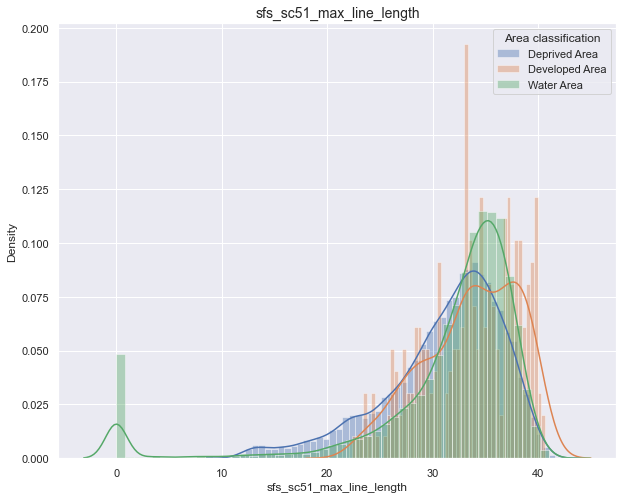

In [11]:
# Feature Distribution for all classes  ( a good way to check which features have different distribution for classes)
# Example: Check ndvi fourier, gabor features. they seem like good predictors
# this can also be used to compare features within the same group of features
for i in context_df.columns:
    Distribution_plot(context_df, "{}".format(i), "Label", "{}".format(i), "{}".format(i))

In [9]:
# Checking for missing values
print(context_df.isna().sum())

orb_sc31_mean               0
lbpm_sc7_skew               0
lbpm_sc5_max                0
lbpm_sc3_max                0
lbpm_sc5_skew               0
                           ..
sfs_sc31_min_line_length    0
mean_sc5_variance           0
sfs_sc51_std                0
sfs_sc31_w_mean             0
sfs_sc51_max_line_length    0
Length: 145, dtype: int64


In [13]:
# Split the data into training and test datasets while keeping the same class distribution
#print('Developed Area', round(context_df['Label'].value_counts()[0]/len(context_df) * 100,2), '% of the dataset')
#print('Deprived Area', round(context_df['Label'].value_counts()[1]/len(context_df) * 100,2), '% of the dataset')
#print('Water Area', round(context_df['Label'].value_counts()[2]/len(context_df) * 100,2), '% of the dataset')


#X = context_df.drop('Label', axis=1)
#y = context_df['Label']
#using StratifiedKfold to generate (Train dataframe and  Test dataframe ) having the same class distribution that is similar to the orginial data

#sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#for train_index, test_index in sss.split(X, y):
    #print("Train:", train_index, "Test:", test_index)
    #original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    #original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    


# Verify the Distribution of the labels


# Turn into an array
#original_Xtrain_array = original_Xtrain.values
#original_Xtest_array = original_Xtest.values
#original_ytrain_array = original_ytrain.values
#original_ytest_array = original_ytest.values

# See if both the train and test label distribution are similarly distributed
#train_unique_label, train_counts_label = np.unique(original_ytrain_array, return_counts=True)
#test_unique_label, test_counts_label = np.unique(original_ytest_array, return_counts=True)
#print('-' * 100)

#print('Label Distributions: \n')
#print(train_counts_label/ len(original_ytrain_array))
#print(test_counts_label/ len(original_ytest_array))

Developed Area 31.96 % of the dataset
Deprived Area 0.57 % of the dataset
Water Area 67.47 % of the dataset
Train: [ 8123  8124  8125 ... 47557 47558 47559] Test: [    0     1     2 ... 25977 26025 26036]
Train: [    0     1     2 ... 47557 47558 47559] Test: [ 8123  8124  8125 ... 34783 34784 34785]
Train: [    0     1     2 ... 47557 47558 47559] Test: [15169 15170 15171 ... 38440 38441 38442]
Train: [    0     1     2 ... 47557 47558 47559] Test: [22194 22195 22196 ... 43532 43533 43534]
Train: [    0     1     2 ... 43532 43533 43534] Test: [31875 31876 31877 ... 47557 47558 47559]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.31964886 0.00565076 0.67470038]
[0.3195963  0.00567704 0.67472666]


In [10]:
# Split data to train and test
X = context_df.drop('Label', axis=1)
y = context_df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)


In [15]:
# Applying smote to oversample and balance classes
#smote = SMOTE(random_state=42)

# Augment the training data
#X_smote_train, y_smote_train = smote.fit_resample(original_Xtrain, original_ytrain)

#print("Label Counts after oversampling")
#y_smote_train.value_counts()

In [11]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the test data
X_test = ss.transform(X_test)

In [ ]:
# Logistic Regression 
#---------The following section will include the implentation of logistic regression
#---------To handle class imbalance, different techniques will be used. 
#----------------1) setting class_weight to "balanced"
#----------------2) assigning class weights and stratified cv
#----------------3) Oversampling
#---------All Techniques will include hyperparamtetr tuning

In [12]:
# Fitting Logistice Regression model
models = {'lr': LogisticRegression(solver= "lbfgs",class_weight = "balanced", random_state=42)}

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

#solver= ["newton-cg", "lbfgs"]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [13]:
# Make directory to save results 
directory = os.path.dirname('result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [14]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=5,
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                            best_param  \
0    0.656114  {'model__C': 1, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=1, class_weight='balance...

In [16]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [17]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9052100840336135, 0.06929133858267716, 0.97...   

                                           Recall  \
0  [0.8815057283142389, 0.88, 0.8993288590604027]   

                                            F1-score  
0  [0.8932006633499171, 0.12846715328467154, 0.93...

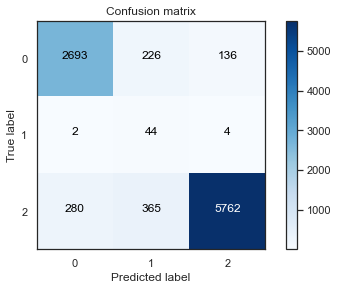

In [18]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [19]:
 print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3055
           1       0.07      0.88      0.13        50
           2       0.98      0.90      0.94      6407

    accuracy                           0.89      9512
   macro avg       0.65      0.89      0.65      9512
weighted avg       0.95      0.89      0.92      9512



In [21]:
# Evaluate odds of each variable and sort by odds value
#odds = np.exp(best_estimator_gs["model"].coef_[0])
#pd.DataFrame(odds, X_train.columns, columns=['odds'])\
#.sort_values(by='odds', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [20]:
# manually set weights
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]



In [21]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym +  'stratifiedCV.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                            best_param  \
0    0.756222  {'model__C': 1, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=1, random_state=42, tol=...

In [22]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9313660477453581, 0.8947368421052632, 0.959...   

                                           Recall  \
0  [0.9194762684124387, 0.34, 0.9703449352270954]   

                                            F1-score  
0  [0.9253829682095207, 0.4927536231884058, 0.965...

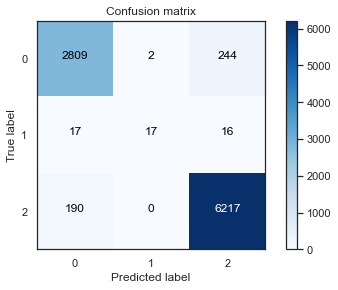

In [23]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [24]:
 print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3055
           1       0.89      0.34      0.49        50
           2       0.96      0.97      0.97      6407

    accuracy                           0.95      9512
   macro avg       0.93      0.74      0.79      9512
weighted avg       0.95      0.95      0.95      9512



In [25]:
# OverSampling
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)

# Applying smote to oversample and balance classes
smote = SMOTE(random_state=42)

# Augment the training data
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

#print("Label Counts after oversampling")
#y_smote_train.value_counts()

In [26]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_smote_train)

# Standardize the test data
X_test = ss.transform(X_test)

In [27]:
# Fitting Logistice Regression model
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

#solver= ["newton-cg", "lbfgs"]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [28]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1',
                      n_jobs=1,
                      cv=5,
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_smote_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + 'over_sampled.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                best_param  \
0         NaN  {'model__C': 0.001, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=0.001, random_state=42, ...

In [29]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9147768836869057, 0.043820224719101124, 0.9...   

                                          Recall  \
0  [0.818657937806874, 0.78, 0.8846574059622289]   

                                            F1-score  
0  [0.864052513387459, 0.08297872340425531, 0.922...

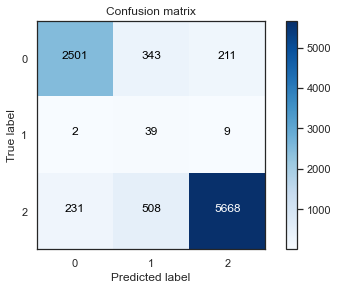

In [30]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [31]:
 print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3055
           1       0.04      0.78      0.08        50
           2       0.96      0.88      0.92      6407

    accuracy                           0.86      9512
   macro avg       0.64      0.83      0.62      9512
weighted avg       0.94      0.86      0.90      9512



In [32]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)

# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the test data
X_test = ss.transform(X_test)

In [33]:
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [34]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                         best_param  \
0    0.868147  {'model__min_samples_leaf': 1, 'model__min_sam...   

                                      best_estimator  
0  ((DecisionTreeClassifier(max_features='auto', ...

In [35]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [36]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9771900826446281, 1.0, 0.9825050317386592]   

                                         Recall  \
0  [0.96759410801964, 0.56, 0.9904791634150149]   

                                            F1-score  
0  [0.9723684210526317, 0.717948717948718, 0.9864...

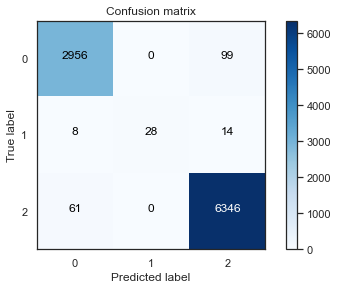

In [37]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [39]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3055
           1       1.00      0.56      0.72        50
           2       0.98      0.99      0.99      6407

    accuracy                           0.98      9512
   macro avg       0.99      0.84      0.89      9512
weighted avg       0.98      0.98      0.98      9512



In [45]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

Features Importance
0  lsr_sc31_line_contrast  0.0864766
1      gabor_sc7_variance  0.0550574
2             hog_sc3_max  0.0487977
3             lac_sc7_lac  0.0376234
4             hog_sc7_max  0.0375497

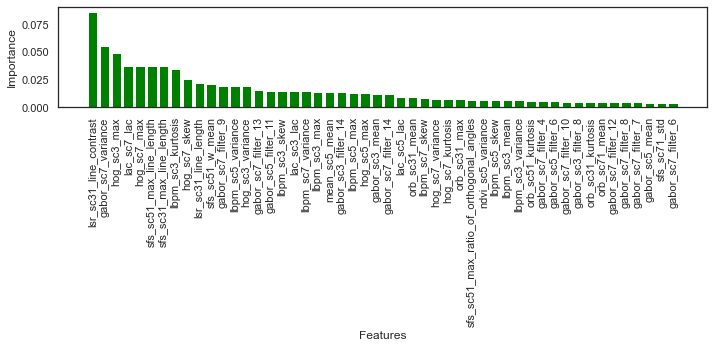

In [50]:
#Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:50], df_fi_rfc['Importance'][:50], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.show()


In [56]:
# Features using top 25 features
top_25=df_fi_rfc['Features'][:25].tolist()

In [63]:
top_25.append("Label")
top_25_df= context_df[top_25]
top_25_df

lsr_sc31_line_contrast  gabor_sc7_variance  hog_sc3_max  lac_sc7_lac  \
0                    1.919693           51.749220     0.591640  2912.782949   
1                    1.916523           52.231494     0.572677  3048.197501   
2                    1.905892           54.525382     0.561988  3257.339511   
3                    1.871950           55.043024     0.555001  3392.382185   
4                    1.859817           57.167449     0.572480  3327.608814   
...                       ...                 ...          ...          ...   
47555                1.106009           78.086894     0.545051  2120.105427   
47556                1.183477           79.877246     0.550471  2128.441650   
47557                1.251927           81.569365     0.568245  2110.931779   
47558                1.250435           82.267896     0.568175  2219.769218   
47559                1.109385           82.190796     0.538796  1761.416344   

       hog_sc7_max  sfs_sc51_max_line_length  sfs_sc31_max_line_length  \
0         0.369057                     26.93                     19.27   
1         0.371683                     25.41                     18.18   
2         0.369850                     24.37                     18.39   
3         0.365252                     23.79                     20.21   
4         0.375161                     25.24                     20.22   
...            ...                       ...                       ...   
47555     0.381714                     27.92                     17.55   
47556     0.381869                     27.84                     17.84   
47557     0.374037                     28.07                     18.10   
47558     0.376073                     27.51                     19.31   
47559     0.385501                     25.59                     15.61   

       lbpm_sc3_kurtosis  hog_sc7_skew  lsr_sc31_line_length  ...  \
0             155.943056   4750.407859              1.925988  ...   
1             158.660951   3976.383552              1.922978  ...   
2             160.981640   4078.195308              1.903688  ...   
3             167.049042   4321.608469              1.876170  ...   
4             166.610075   5059.475612              1.873351  ...   
...                  ...           ...                   ...  ...   
47555         158.048241   6159.432233              1.090400  ...   
47556         151.606242   5870.211390              1.168964  ...   
47557         153.442857   6072.822501              1.226305  ...   
47558         158.389476   5755.731449              1.225271  ...   
47559         155.199943   5006.663924              1.091476  ...   

       lbpm_sc3_skew  lac_sc3_lac  lbpm_sc7_variance  lbpm_sc3_max  \
0          19.293633     9.174011          23.360865          5.86   
1          19.633597     6.090226          22.711850          5.66   
2          19.900262     9.224537          22.456975          5.69   
3          20.367279     8.445150          22.048434          5.71   
4          20.263245     8.441833          22.099652          5.71   
...              ...          ...                ...           ...   
47555      19.505091     1.953961          22.143033          5.71   
47556      18.933454     2.745112          22.762515          5.81   
47557      19.211649     3.675834          21.858691          5.79   
47558      19.677188     3.674176          22.382848          5.73   
47559      19.408214     4.299441          21.319723          5.51   

       mean_sc5_mean  gabor_sc3_filter_14  lbpm_sc5_max  hog_sc5_max  \
0          11.845087             0.704285         14.34     0.410873   
1          11.952271             0.813707         14.03     0.416265   
2          12.199048             0.825807         13.76     0.412583   
3          12.308340             0.804898         13.71     0.415048   
4          12.533627             0.833178         13.87     0.418907   
...              ...                  ...           ...          ..

In [64]:
# Splitting data after feature selection
X = top_25_df.drop('Label', axis=1)
y = top_25_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)

# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the test data
X_test = ss.transform(X_test)

In [65]:
# Train Logistic Regression
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]


In [67]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym +  'top_25.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0    0.670016  {'model__C': 10, 'model__tol': 1e-05}   

                                      best_estimator  
0  (LogisticRegression(C=10, random_state=42, tol...

In [68]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9002416292716603, 0.8, 0.9287443267776097]   

                                          Recall  \
0  [0.853682487725041, 0.08, 0.9581707507413766]   

                                            F1-score  
0  [0.8763440860215053, 0.14545454545454545, 0.94...

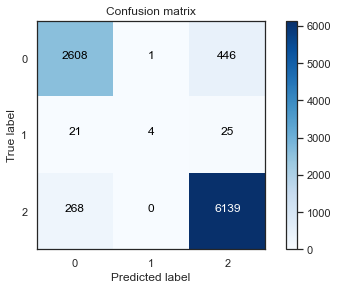

In [69]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [70]:
 print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      3055
           1       0.80      0.08      0.15        50
           2       0.93      0.96      0.94      6407

    accuracy                           0.92      9512
   macro avg       0.88      0.63      0.66      9512
weighted avg       0.92      0.92      0.92      9512



In [71]:
# Random Forest
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [72]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + 'top_25.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                         best_param  \
0    0.822368  {'model__min_samples_leaf': 1, 'model__min_sam...   

                                      best_estimator  
0  ((DecisionTreeClassifier(max_features='auto', ...

In [73]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [74]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9649949511948839, 1.0, 0.9682564023922712]   

                                          Recall  \
0  [0.9384615384615385, 0.4, 0.9854846261901046]   

                                            F1-score  
0  [0.9515433123133089, 0.5714285714285715, 0.976...

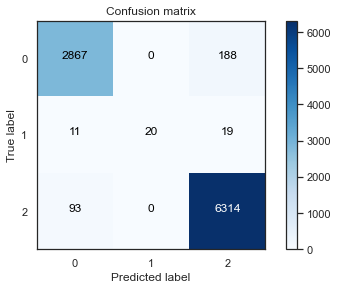

In [75]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [76]:
 print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3055
           1       1.00      0.40      0.57        50
           2       0.97      0.99      0.98      6407

    accuracy                           0.97      9512
   macro avg       0.98      0.77      0.83      9512
weighted avg       0.97      0.97      0.97      9512



In [79]:
y_test.value_counts()

2    6407
0    3055
1      50
Name: Label, dtype: int64